# Multiple Linear Regression

## Bike-sharing Case Study

#### Problem Statement:

Problem Statement: BoomBikes, a US bike-sharing provider, has faced significant revenue declines due to the COVID-19 pandemic. To recover and gain a competitive edge post-lockdown, BoomBikes aims to understand the factors influencing the demand for shared bikes. The company seeks insights into which variables significantly predict bike demand and how well these variables explain the fluctuations in demand in the American market. This analysis will help BoomBikes prepare to meet customer needs effectively and drive future profitability.

 It wishes to use the data to optimise the the demand for shared bikes in the American market based on important factors such as humidity, windspeed, weathersit, etc.

Here are the key points of what BoomBikes wants:

- **Identify significant variables:** Understand which factors significantly affect the demand for shared bikes.
- **Predict bike demand:** Determine how well these variables can predict the demand for shared bikes.
- **Prepare for post-pandemic recovery:** Use the insights to prepare for increased demand after the COVID-19 lockdown ends.
- **Gain a competitive edge:** Stand out from other service providers by better understanding and meeting customer needs.
- **Increase profitability:** Develop strategies to accelerate revenue growth and achieve higher profits.

**So interpretation is important!**

=========================================
## Dataset characteristics
=========================================	

day.csv have the following fields:
	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

- Reading and Understanding the Data
- EDA and Visualising the Data
- Data Preparation
    - Dummy Variables Encoding
    - Splitting the Data into Training and Testing Sets
- Linear Model Building using different Model Techniques
- Improving Model using RFE
- Residual Analysis of the train data
- Making Predictions on test set
- Model Evaluation

## Step 1: Reading and Understanding the Data

import libraries and read the shared bike dataset

In [1205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.express as px
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1206]:
df_bikes = pd.read_csv("day.csv")

In [1207]:
# Check the head of the dataset
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### There are 730 observation and 16 features.

In [1208]:
df_bikes.shape

(730, 16)

## Dataset Information

In [1209]:
df_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1210]:
df_bikes.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## Missing or Null Values

In [1211]:
# Missing Values/Null Values Count
df_bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Understanding variables

In [1212]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Top 5

In [1213]:
df_bikes.sort_values(by=['cnt'],ascending=False).head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
622,623,15-09-2019,3,1,9,0,6,0,1,24.941653,29.29335,50.1667,16.583907,3160,5554,8714
636,637,29-09-2019,4,1,9,0,6,0,1,22.242500,26.51480,54.2917,15.249468,2589,5966,8555
629,630,22-09-2019,3,1,9,0,6,0,1,26.650000,30.52440,64.6667,19.000061,2512,5883,8395
446,447,23-03-2019,2,1,3,0,5,1,2,24.668347,28.50335,69.4167,7.792100,2469,5893,8362
503,504,19-05-2019,2,1,5,0,6,0,1,24.600000,28.34540,45.6250,5.626325,3410,4884,8294


## Step 2: EDA and Visualising the Data to understand the below points
- Univariate Analysis
- Byvariate Analysis
- If there is some obvious multicollinearity going on
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

Derived Matrix

In [1214]:
#temprature ratio
df_bikes['temp_ratio']=df_bikes['temp']/df_bikes['cnt']
#windspeed ratio
df_bikes['windspeed_ratio']=df_bikes['windspeed']/df_bikes['cnt']

# Categorising temp into buckets
bins = [0,5,10, 15,20,25,35]
labels = ['0-5','5-10','10-15','15-20','20-25','25-35']
df_bikes['temp_bucket'] = pd.cut(df_bikes['temp'], bins=bins, labels=labels)


# Categorising windspeed into buckets
bins = [0,5,10, 15,20,25,35]
labels = ['0-5','5-10','10-15','15-20','20-25','25-35']
df_bikes['windspeed_bucket'] = pd.cut(df_bikes['windspeed'], bins=bins, labels=labels)
df_bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_ratio,windspeed_ratio,temp_bucket,windspeed_bucket
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0.014326,0.010914,10-15,10-15
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0.018605,0.020789,10-15,15-20
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.005968,0.012333,5-10,15-20
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0.005250,0.006876,5-10,10-15
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.005816,0.007826,5-10,10-15


In [1215]:
df_bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_ratio,windspeed_ratio
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849,0.006273,0.005609
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647,0.030288,0.040495
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,0.001861,0.000301
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000,0.003485,0.001714
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000,0.004536,0.002694
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000,0.006009,0.004550
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,0.820000,1.090882


## Univariate Analysis

### Categorical Analysis

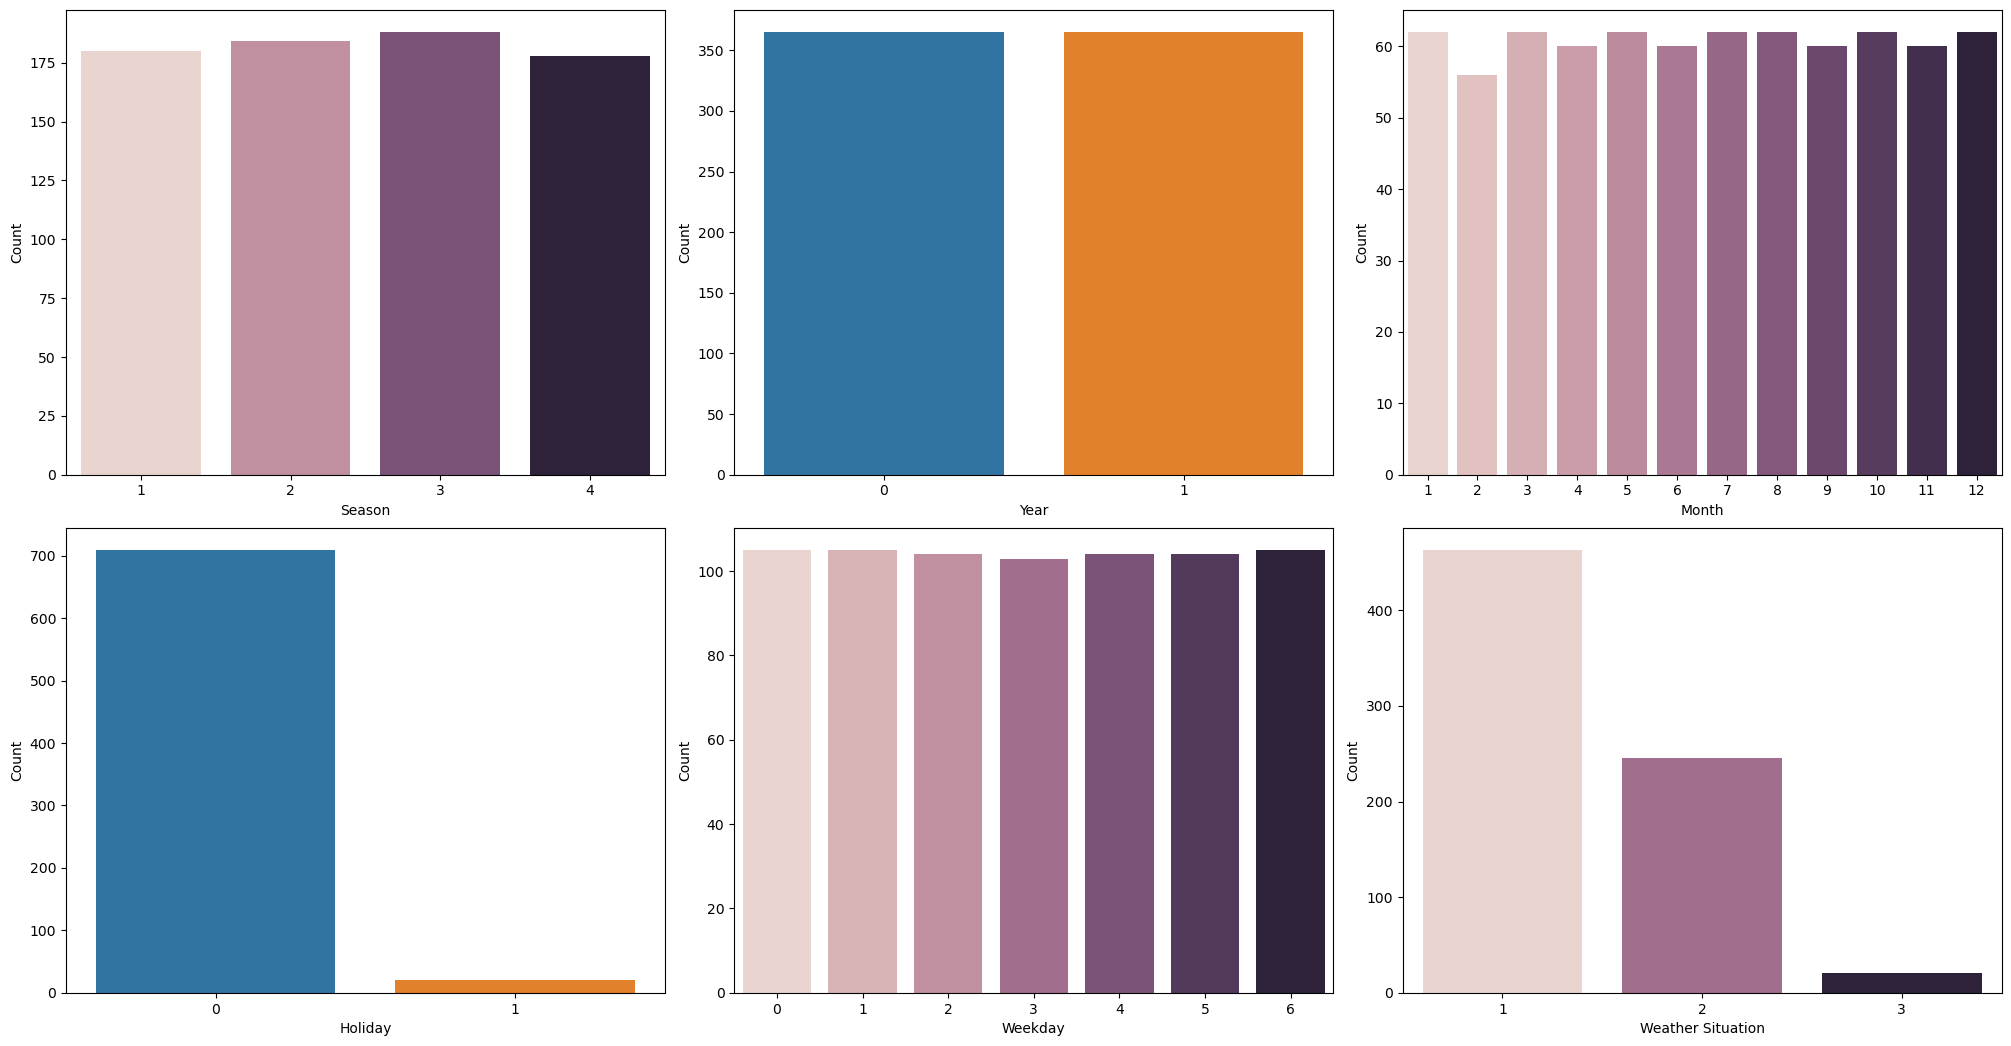

In [1216]:

fig=plt.figure(constrained_layout=True,figsize=(20,15))
gs=GridSpec(3,3,figure=fig)

#Season Analysis
ax6=fig.add_subplot(gs[0,0])
sns.countplot(data=df_bikes, x='season', order=sorted(df_bikes['season'].unique()), hue='season',ax=ax6,)
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend([],[],frameon=False)

#Year Analysis
ax5=fig.add_subplot(gs[0,1])
sns.countplot(data=df_bikes, x='yr', order=sorted(df_bikes['yr'].unique()), hue='yr',ax=ax5)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend([],[],frameon=False)

#Month Analysis
ax5=fig.add_subplot(gs[0,2])
sns.countplot(data=df_bikes, x='mnth', order=sorted(df_bikes['mnth'].unique()), hue='mnth',ax=ax5)
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend([],[],frameon=False)

#Holiday Analysis
ax6=fig.add_subplot(gs[1,0])
sns.countplot(data=df_bikes, x='holiday', order=df_bikes['holiday'].unique(), hue='holiday',ax=ax6)
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.legend([],[],frameon=False)

#Weekday Analysis
ax5=fig.add_subplot(gs[1,1])
sns.countplot(data=df_bikes, x='weekday', order=sorted(df_bikes['weekday'].unique()), hue='weekday',ax=ax5)
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend([],[],frameon=False)


ax5=fig.add_subplot(gs[1,2])
sns.countplot(data=df_bikes, x='weathersit', order=sorted(df_bikes['weathersit'].unique()), hue='weathersit',ax=ax5)
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.legend([],[],frameon=False)

 # Display the chart 
plt.show()

### Numerical Analysis

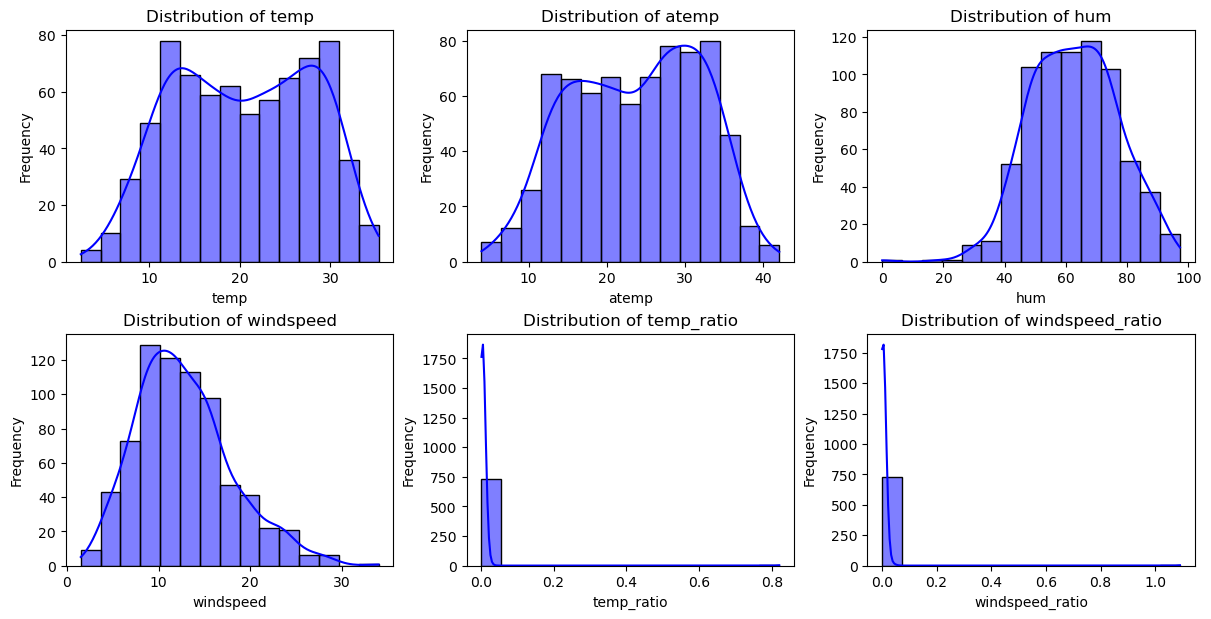

In [1217]:

fig=plt.figure(constrained_layout=True,figsize=(12,20))
gs=GridSpec(8,3,figure=fig)

numerical = df_bikes.select_dtypes(include=['float64']).columns

i=j=0                                                                             
for column in numerical:
    if (i==0):
        axe=fig.add_subplot(gs[0,j])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
    elif (i % 2)!= 0:
        axe=fig.add_subplot(gs[i,j])                                                                     
    else: 
         axe=fig.add_subplot(gs[i,j])          
         
    j+=1   

    if (j>2): 
       j=0
       i+=1 
    sns.histplot(df_bikes[column], kde=True, color='blue',ax=axe,bins=15)          
    title = "Distribution of " + column
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.show()   

## Segmented Analysis

In [1218]:
df_bikes[['temp', 'temp_bucket']].head(10)

,temp,temp_bucket
0,14.110847,10-15
1,14.902598,10-15
2,8.050924,5-10
3,8.200000,5-10
4,9.305237,5-10
5,8.378268,5-10
6,8.057402,5-10
7,6.765000,5-10
8,5.671653,5-10
9,6.184153,5-10


In [1219]:
df_bikes[['temp_bucket']].value_counts()

temp_bucket
25-35          241
10-15          160
15-20          138
20-25          130
5-10            56
0-5              4
Name: count, dtype: int64

In [1220]:
df_bikes[['windspeed', 'windspeed_bucket']].head(10)

,windspeed,windspeed_bucket
0,10.749882,10-15
1,16.652113,15-20
2,16.636703,15-20
3,10.739832,10-15
4,12.522300,10-15
5,6.000868,5-10
6,11.304642,10-15
7,17.875868,15-20
8,24.250650,20-25
9,14.958889,10-15


In [1221]:
df_bikes[['windspeed_bucket']].value_counts()

windspeed_bucket
10-15               269
5-10                211
15-20               148
20-25                54
0-5                  31
25-35                17
Name: count, dtype: int64

## Byvariate Analysis

### Categorical

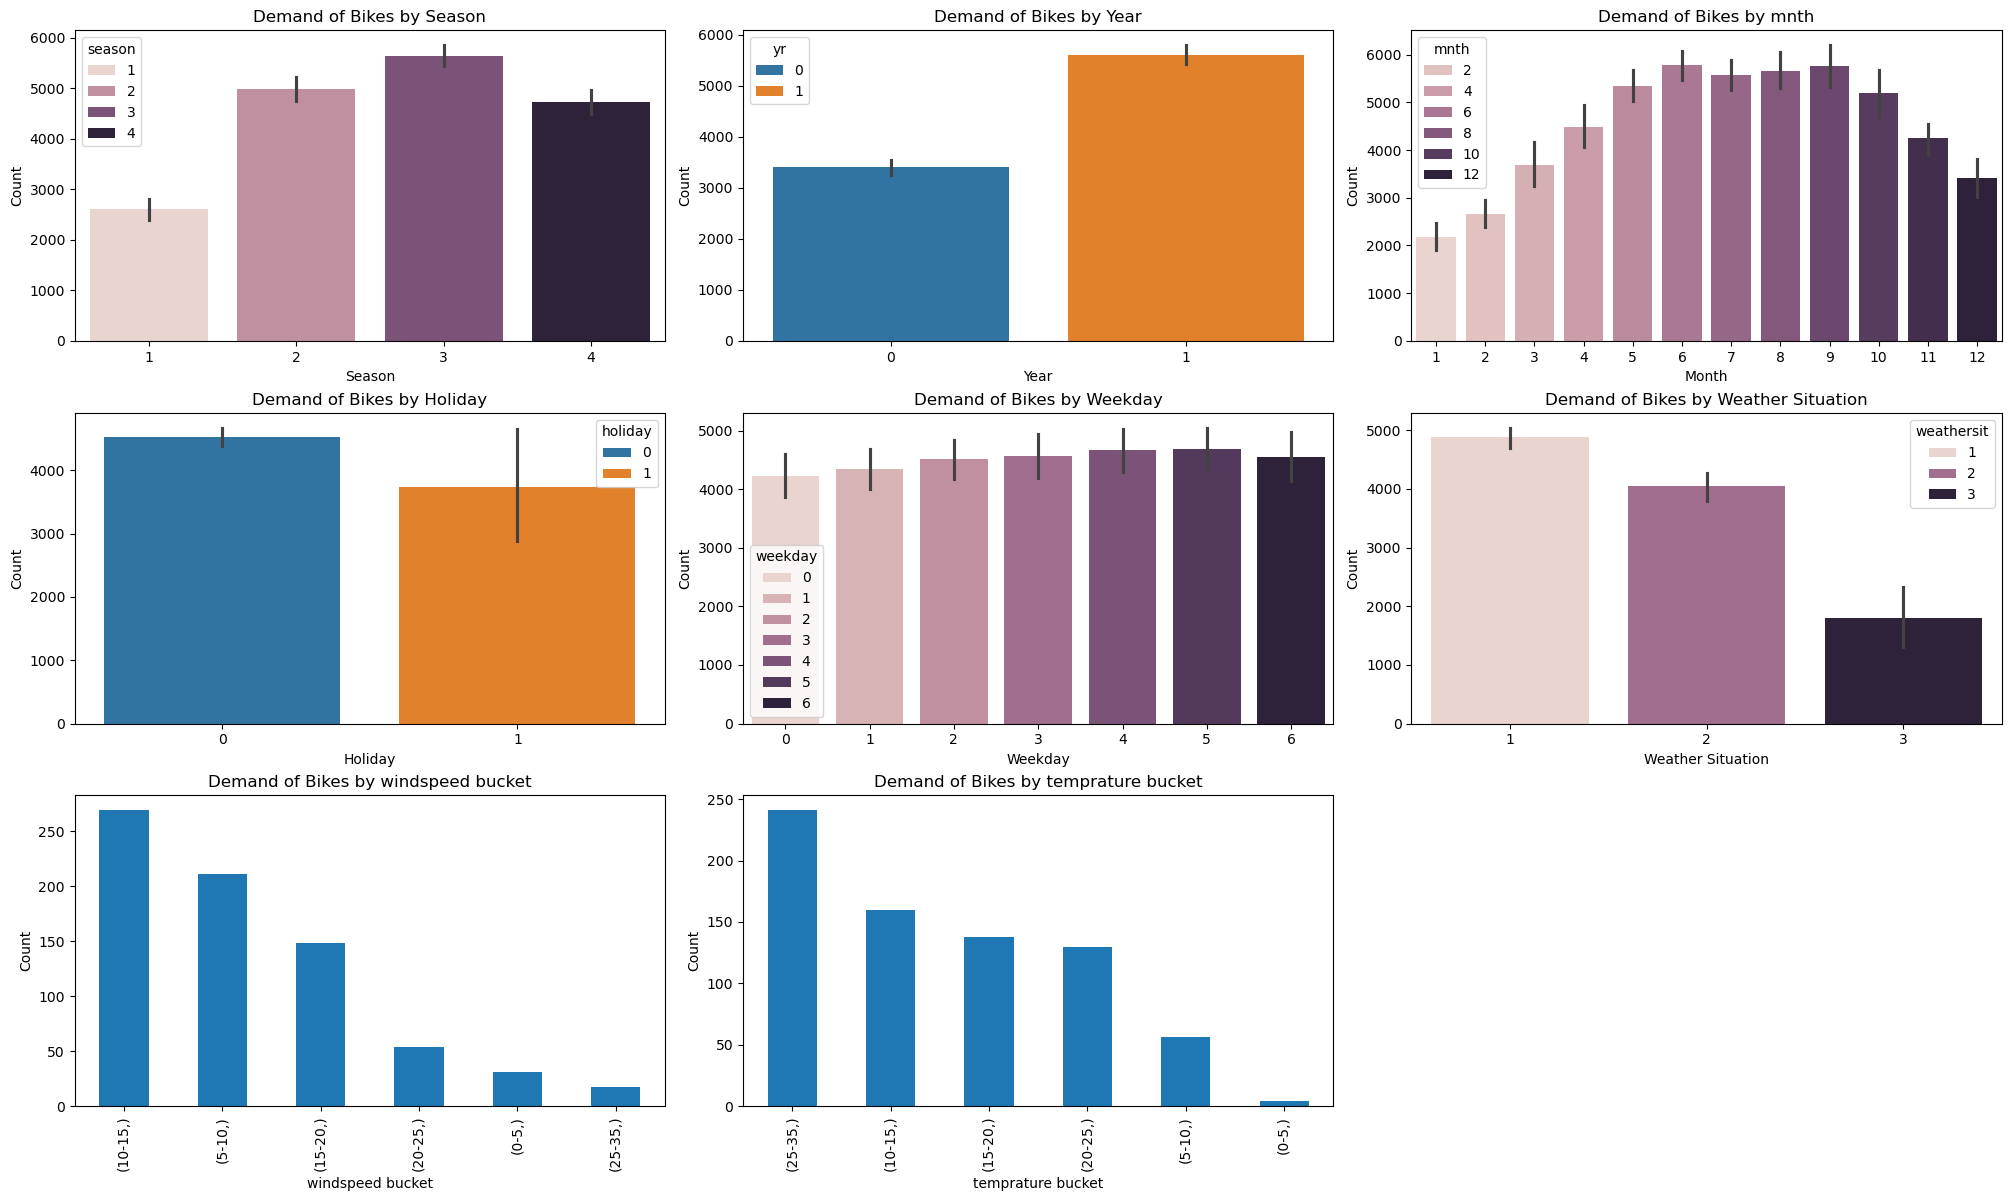

In [1222]:

fig=plt.figure(constrained_layout=True,figsize=(20,15))
gs=GridSpec(4,3,figure=fig)

#Season Analysis
ax6=fig.add_subplot(gs[0,0])
sns.barplot(data=df_bikes, x='season', y='cnt', order=sorted(df_bikes['season'].unique()), hue='season',ax=ax6,)
plt.title('Demand of Bikes by Season')
plt.xlabel('Season')
plt.ylabel('Count')


#Year Analysis
ax5=fig.add_subplot(gs[0,1])
sns.barplot(data=df_bikes, x='yr', y='cnt', order=sorted(df_bikes['yr'].unique()), hue='yr',ax=ax5)
plt.title('Demand of Bikes by Year')
plt.xlabel('Year')
plt.ylabel('Count')


#Month Analysis
ax5=fig.add_subplot(gs[0,2])
sns.barplot(data=df_bikes, x='mnth', y='cnt', order=sorted(df_bikes['mnth'].unique()), hue='mnth',ax=ax5)
plt.title('Demand of Bikes by mnth')
plt.xlabel('Month')
plt.ylabel('Count')


#Holiday Analysis
ax6=fig.add_subplot(gs[1,0])
sns.barplot(data=df_bikes, x='holiday', y='cnt' ,order=df_bikes['holiday'].unique(), hue='holiday',ax=ax6)
plt.title('Demand of Bikes by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')


#Weekday Analysis
ax5=fig.add_subplot(gs[1,1])
sns.barplot(data=df_bikes, x='weekday', y='cnt',order=sorted(df_bikes['weekday'].unique()), hue='weekday',ax=ax5)
plt.title('Demand of Bikes by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')


ax5=fig.add_subplot(gs[1,2])
sns.barplot(data=df_bikes, x='weathersit', y='cnt', order=sorted(df_bikes['weathersit'].unique()), hue='weathersit',ax=ax5)
plt.title('Demand of Bikes by Weather Situation') 
plt.xlabel('Weather Situation')
plt.ylabel('Count')
plt.title('Demand of Bikes by Weather Situation')

ax5=fig.add_subplot(gs[2,0])
df_bikes[['windspeed_bucket']].value_counts().plot.bar()
plt.xlabel('windspeed bucket')
plt.ylabel('Count')
plt.title('Demand of Bikes by windspeed bucket')

ax5=fig.add_subplot(gs[2,1])
df_bikes[['temp_bucket']].value_counts().plot.bar()
plt.xlabel('temprature bucket')
plt.ylabel('Count')
plt.title('Demand of Bikes by temprature bucket')

 # Display the chart 
plt.show()

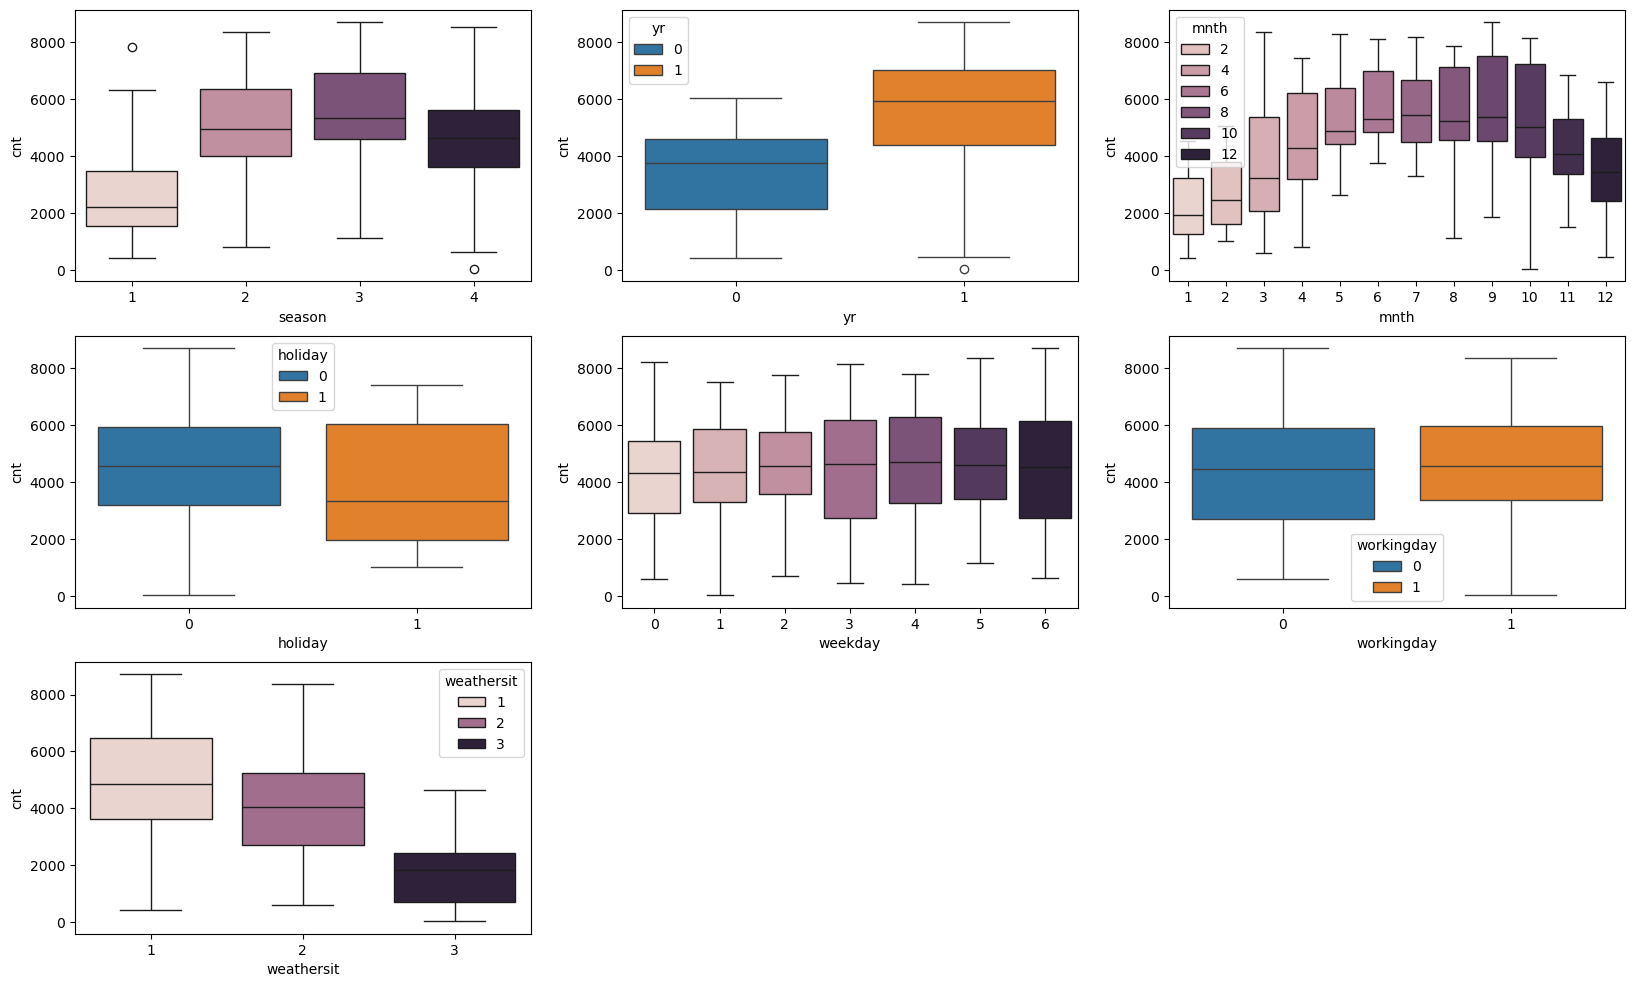

In [1223]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bikes, hue='season')
plt.legend([],[], frameon=False)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bikes,hue='yr')
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bikes,hue='mnth')
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt',data = df_bikes,hue='holiday')
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bikes,hue='weekday')
plt.legend([],[], frameon=False)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bikes,hue='workingday')
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bikes, hue='weathersit')

plt.show()

### Stronger Relationships:

**yr (Year):**

There's a clear and significant increase in bike demand from 2018 to 2019. This indicates a `strong relationship` between the year and the number of demand.

**weathersit (Weather Situation):**

The median bike demand vary significantly across different weather situations, with clear weather leading to the highest demand and adverse weather leading to the lowest. This suggests a `strong relationship` between weather conditions and bike demand.

**mnth (Month):**

The seasonal pattern with higher demand in summer months and lower demand in winter months indicates a fairly `strong relationship` between the month of the year and bike demand.

**Season:**

Similar to months, the season shows a noticeable difference in bike demand, with summer and fall having higher demand compared to spring and winter. This suggests a `strong relationship`.

### Weaker Relationships:

**Weekday:**

The median bike demand are fairly consistent across the weekdays, indicating a `weak relationship` between the day of the week and bike demand.

**Workingday:**

There is only a slight difference in median demand between working days and non-working days, suggesting a `weaker relationship`.

**Holiday:**

The difference in demand between holidays and non-holidays is minimal, indicating a `weak relationship`.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season, mnth,holiday, weekday, workingday, and wethersit` with `year` as the hue.

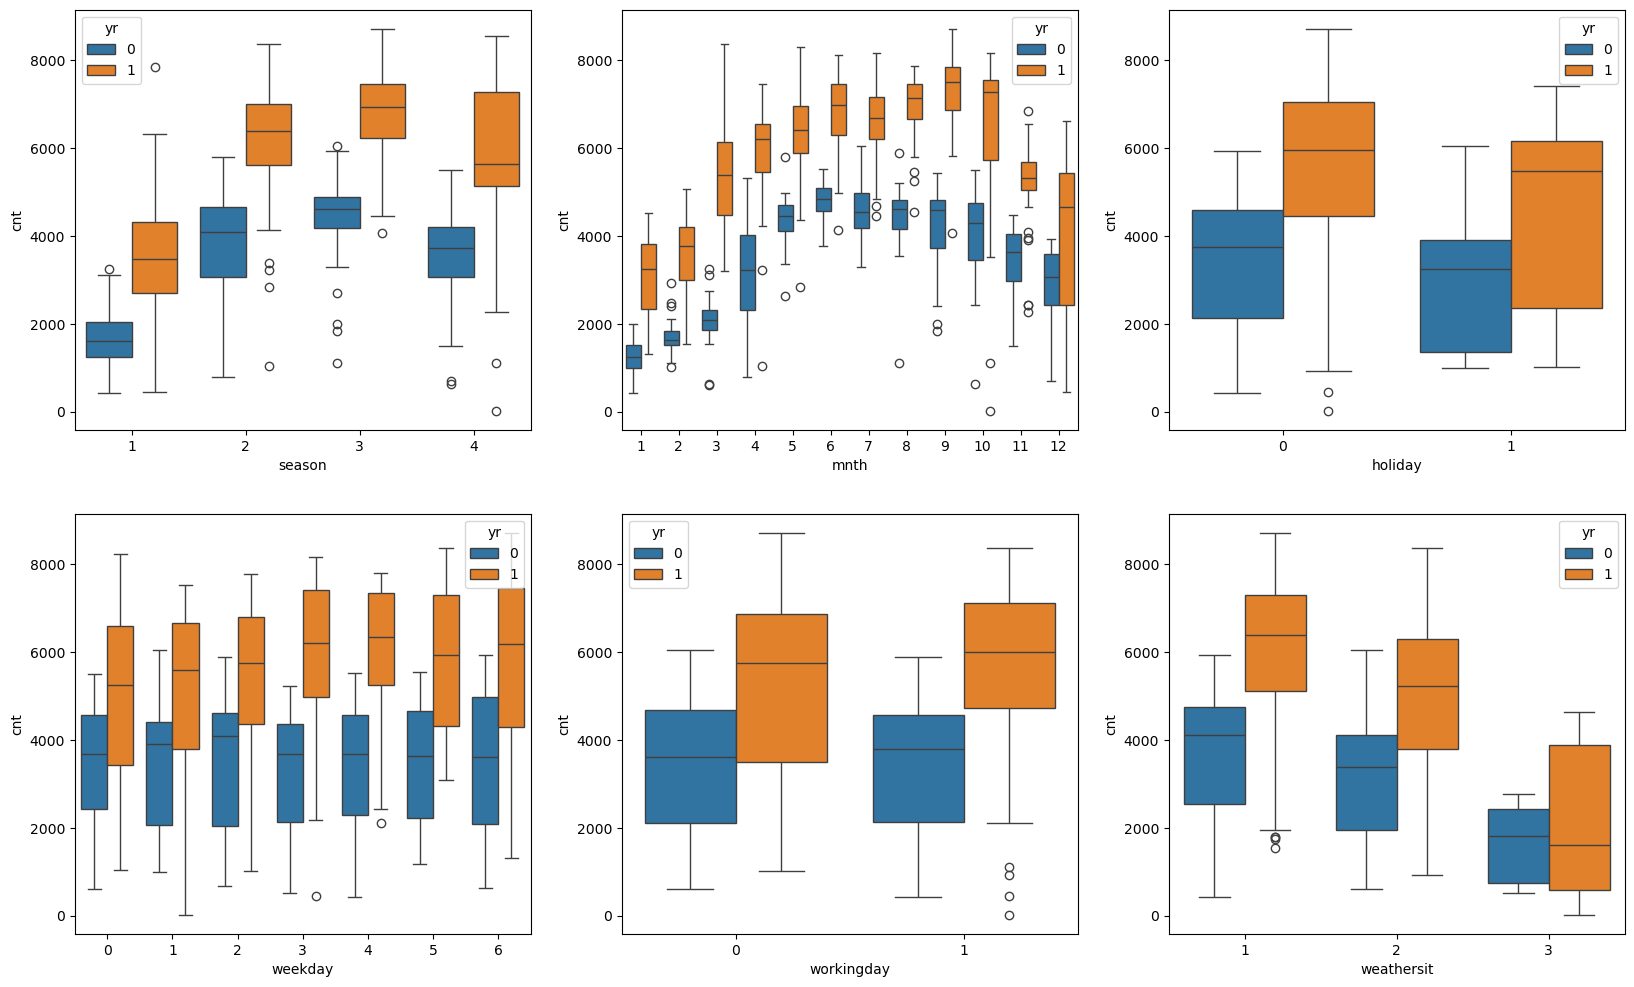

In [1224]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt',hue = 'yr', data = df_bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr',data = df_bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt',hue = 'yr', data = df_bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt',hue = 'yr', data = df_bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt',hue = 'yr', data = df_bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt',hue = 'yr', data = df_bikes)
plt.show()

The boxplots visualize the distribution of the target variable ("cnt") across different categories of several categorical variables: season, mnth, holiday, weekday, workingday, and weathersit.

## Effect of Categorical Variables:

**Season vs. cnt:**

    Across all seasons, the average demand count of bike demand in 2019 is higher than in 2018.

    Season summer and fall have higher demand counts compared to seasons winter and spring which is lowest.

    There's a notable increase in demand in season `fall` for 2019, indicating possibly higher usage in that period compared to 2018.

**Month vs. cnt:**

Bike demand peak around mid-year (`May to August`) for both years, which is typical for warmer months.

In 2019, the demand counts are consistently higher throughout the year compared to 2018.

A drop in demand is seen in December and Jan-March for both years, likely due to colder weather.

**Holiday vs. cnt:**

There is no significant difference between holidays and non-holidays in terms of the average count of bike demand.

However, the variability in the demand counts on holidays is higher, suggesting that while the median/average might not differ much, the usage pattern can vary more on holidays.

**Weekday vs. cnt:**

The demand counts across weekdays show slight variations.

Both years have similar distributions across the weekdays, with 2019 having generally higher median/average demand.

The demand counts seem to be more consistent across the week.

**Working day vs. cnt:**

Demands on working days are slightly lower in terms of median/average count compared to non-working days for both years.

2019 has higher counts on both working and non-working days compared to 2018.

**Weather situation (weathersit) vs. cnt:**

`Weather situation 1 (clear or partly cloudy)` has the highest average demand, followed by `situation 2 (misty)`.

`Situation 3 (light rain or snow)` has significantly lower demand counts.

For all weather situations, 2019 shows higher demad counts compared to 2018.

Overall, the plots indicate that 2019 had higher bike demand across different conditions compared to 2018, with seasonality, month, and weather playing significant roles in determining the count of demand.


**Variability:** The height of the boxes and the length of the whiskers indicate the variability within each category. Some categories show more variability in the target variable than others.

## Inference from Box Plots with Median Values:

#### Season:

**Season 1 (Winter):** The median number of bike demand is around 2500.

**Season 2 (Spring):** The median bike demand is approximately 4500.

**Season 3 (Summer):** The median bike demand is about 5000.

**Season 4 (Fall):** The median bike demand is  around 5000.

#### Year (yr):

**Year 0 (First Year):** The median bike demand is about 4000.

**Year 1 (Second Year):** The median bike dmand increase to approximately 6000.

### Month (mnth):

The median bike demand is lowest in January (mnth = 1) and February (mnth = 2), around 2500.

The highest medians are seen in July (mnth = 7) and August (mnth = 8), with median demand close to 6000.

#### Holiday:

**Non-Holiday (holiday = 0):** The median bike demand is about 4500.

**Holiday (holiday = 1):** The median bike demand drop to around 3000.

#### Weekday:

The median bike demand across weekdays range from approximately 4000 to 5000, with minor variations.

#### Working Day:

**Non-Working Day (workingday = 0):** The median bike demand are about 4000.

**Working Day (workingday = 1):** The median bike demand is slightly higher, around 4500.

#### Weather Situation (weathersit):

**Weather Condition 1 (weathersit = 1):** The median bike demand is approximately 5000.

**Weather Condition 2 (weathersit = 2):** The median bike demand decrease to about 4000.

**Weather Condition 3 (weathersit = 3):** The median bike demand further drop to around 2000.

These actual median values provide a clearer picture of how each factor affects the number of bike demand.

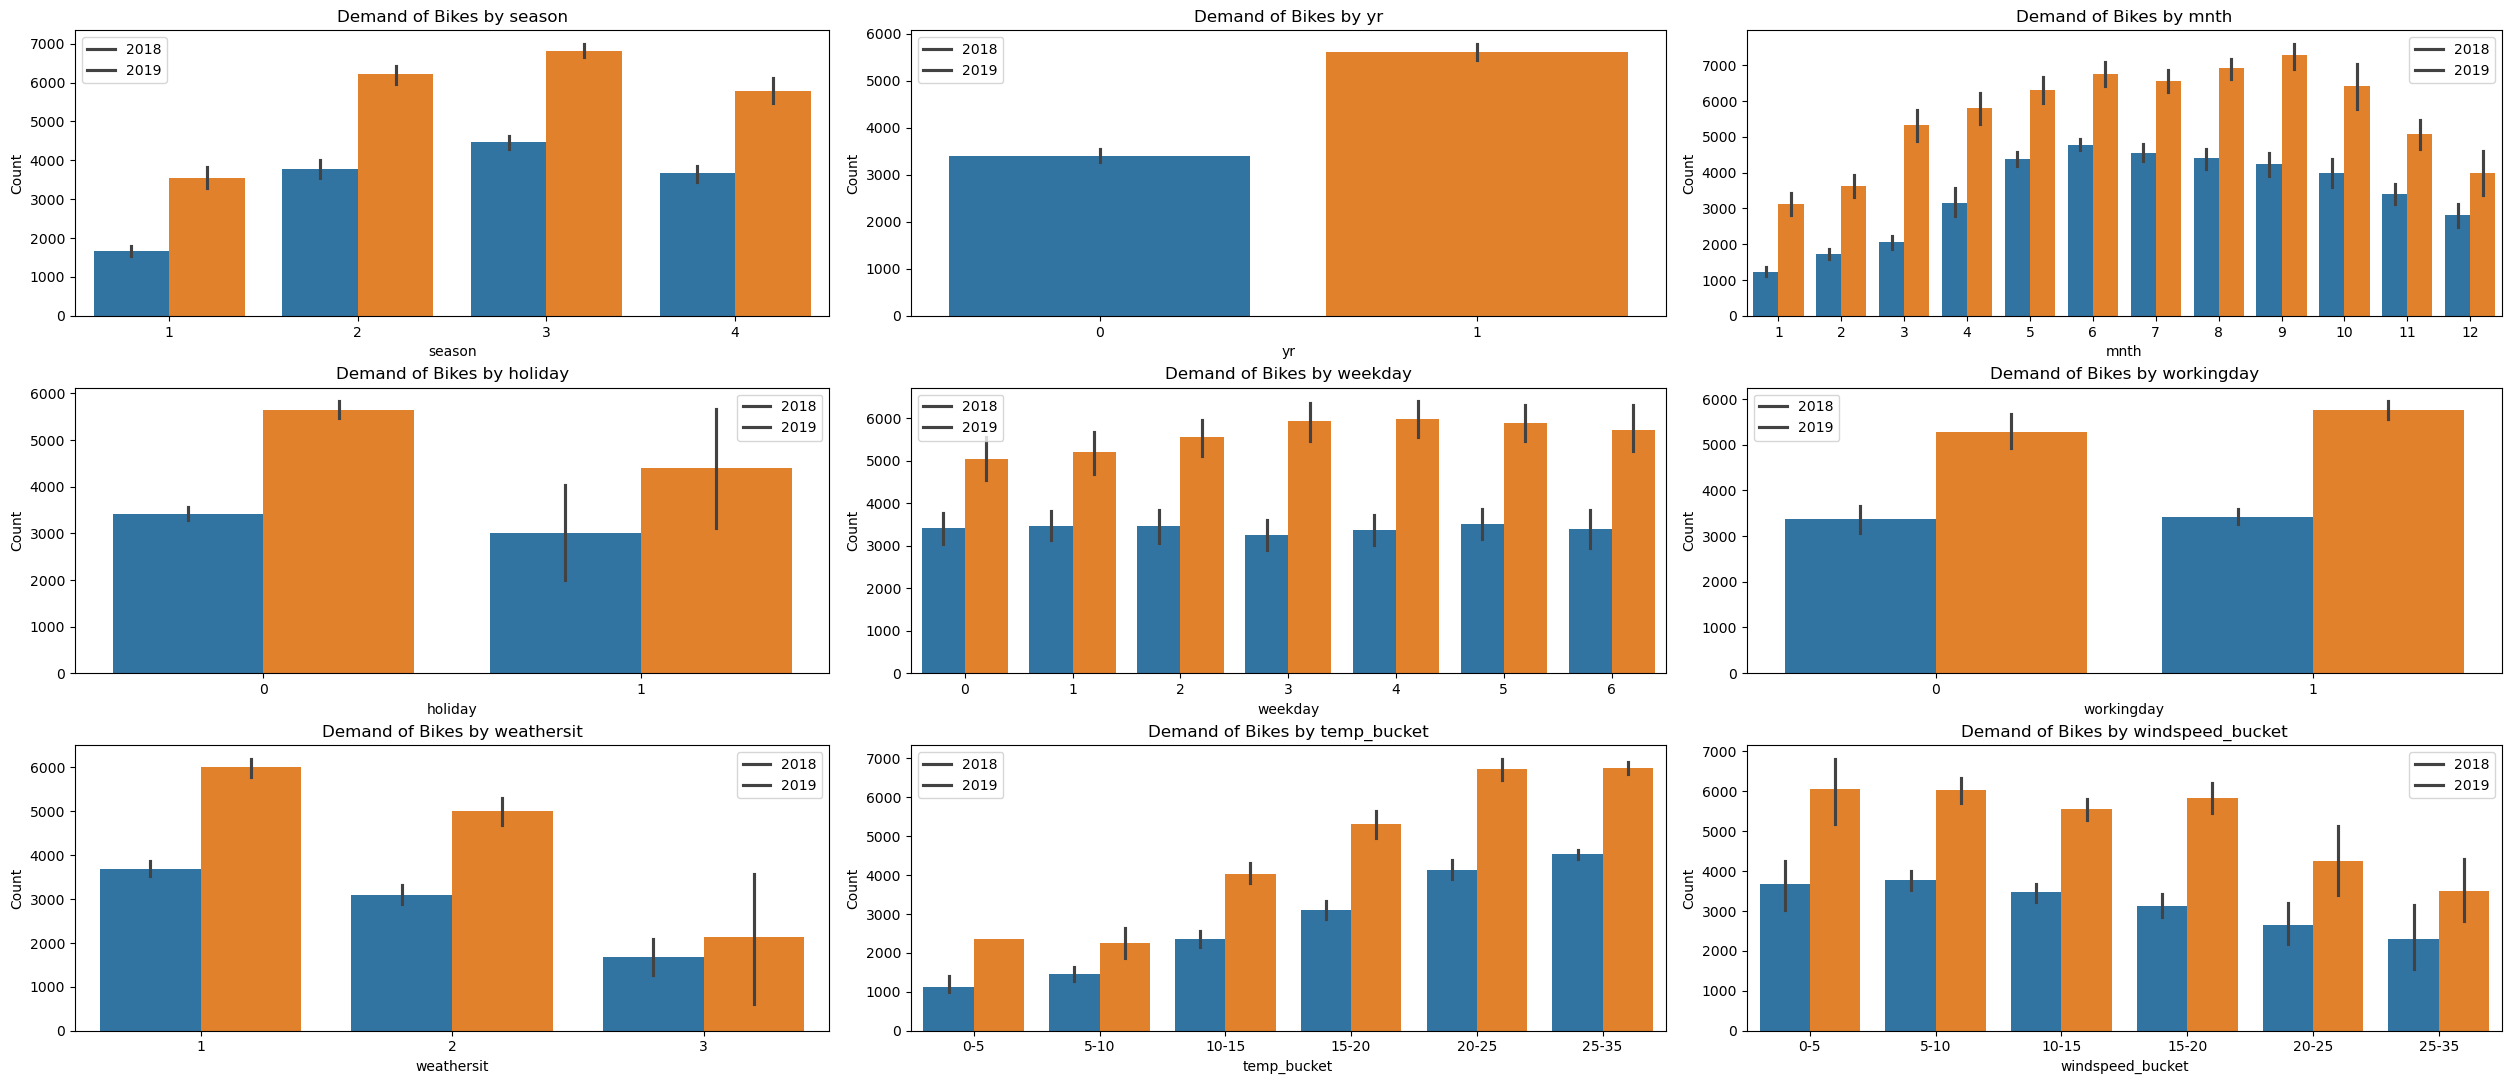

In [1225]:
fig=plt.figure(constrained_layout=True,figsize=(25,25))
gs=GridSpec(8,3,figure=fig)
i=j=0
for column in df_bikes[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp_bucket','windspeed_bucket']].columns:
    if (i==0):
        axe=fig.add_subplot(gs[0,j])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
    elif (i % 2)!= 0:
        axe=fig.add_subplot(gs[i,j])                                                                     
    else: 
         axe=fig.add_subplot(gs[i,j])          
         
    j+=1   

    if (j>2): 
       j=0
       i+=1 
    sns.barplot(data=df_bikes, x=column, y='cnt',  hue='yr',ax=axe)
    title = "Demand of Bikes by " + column
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(labels=['2018', '2019'])
plt.show()

### Numerical

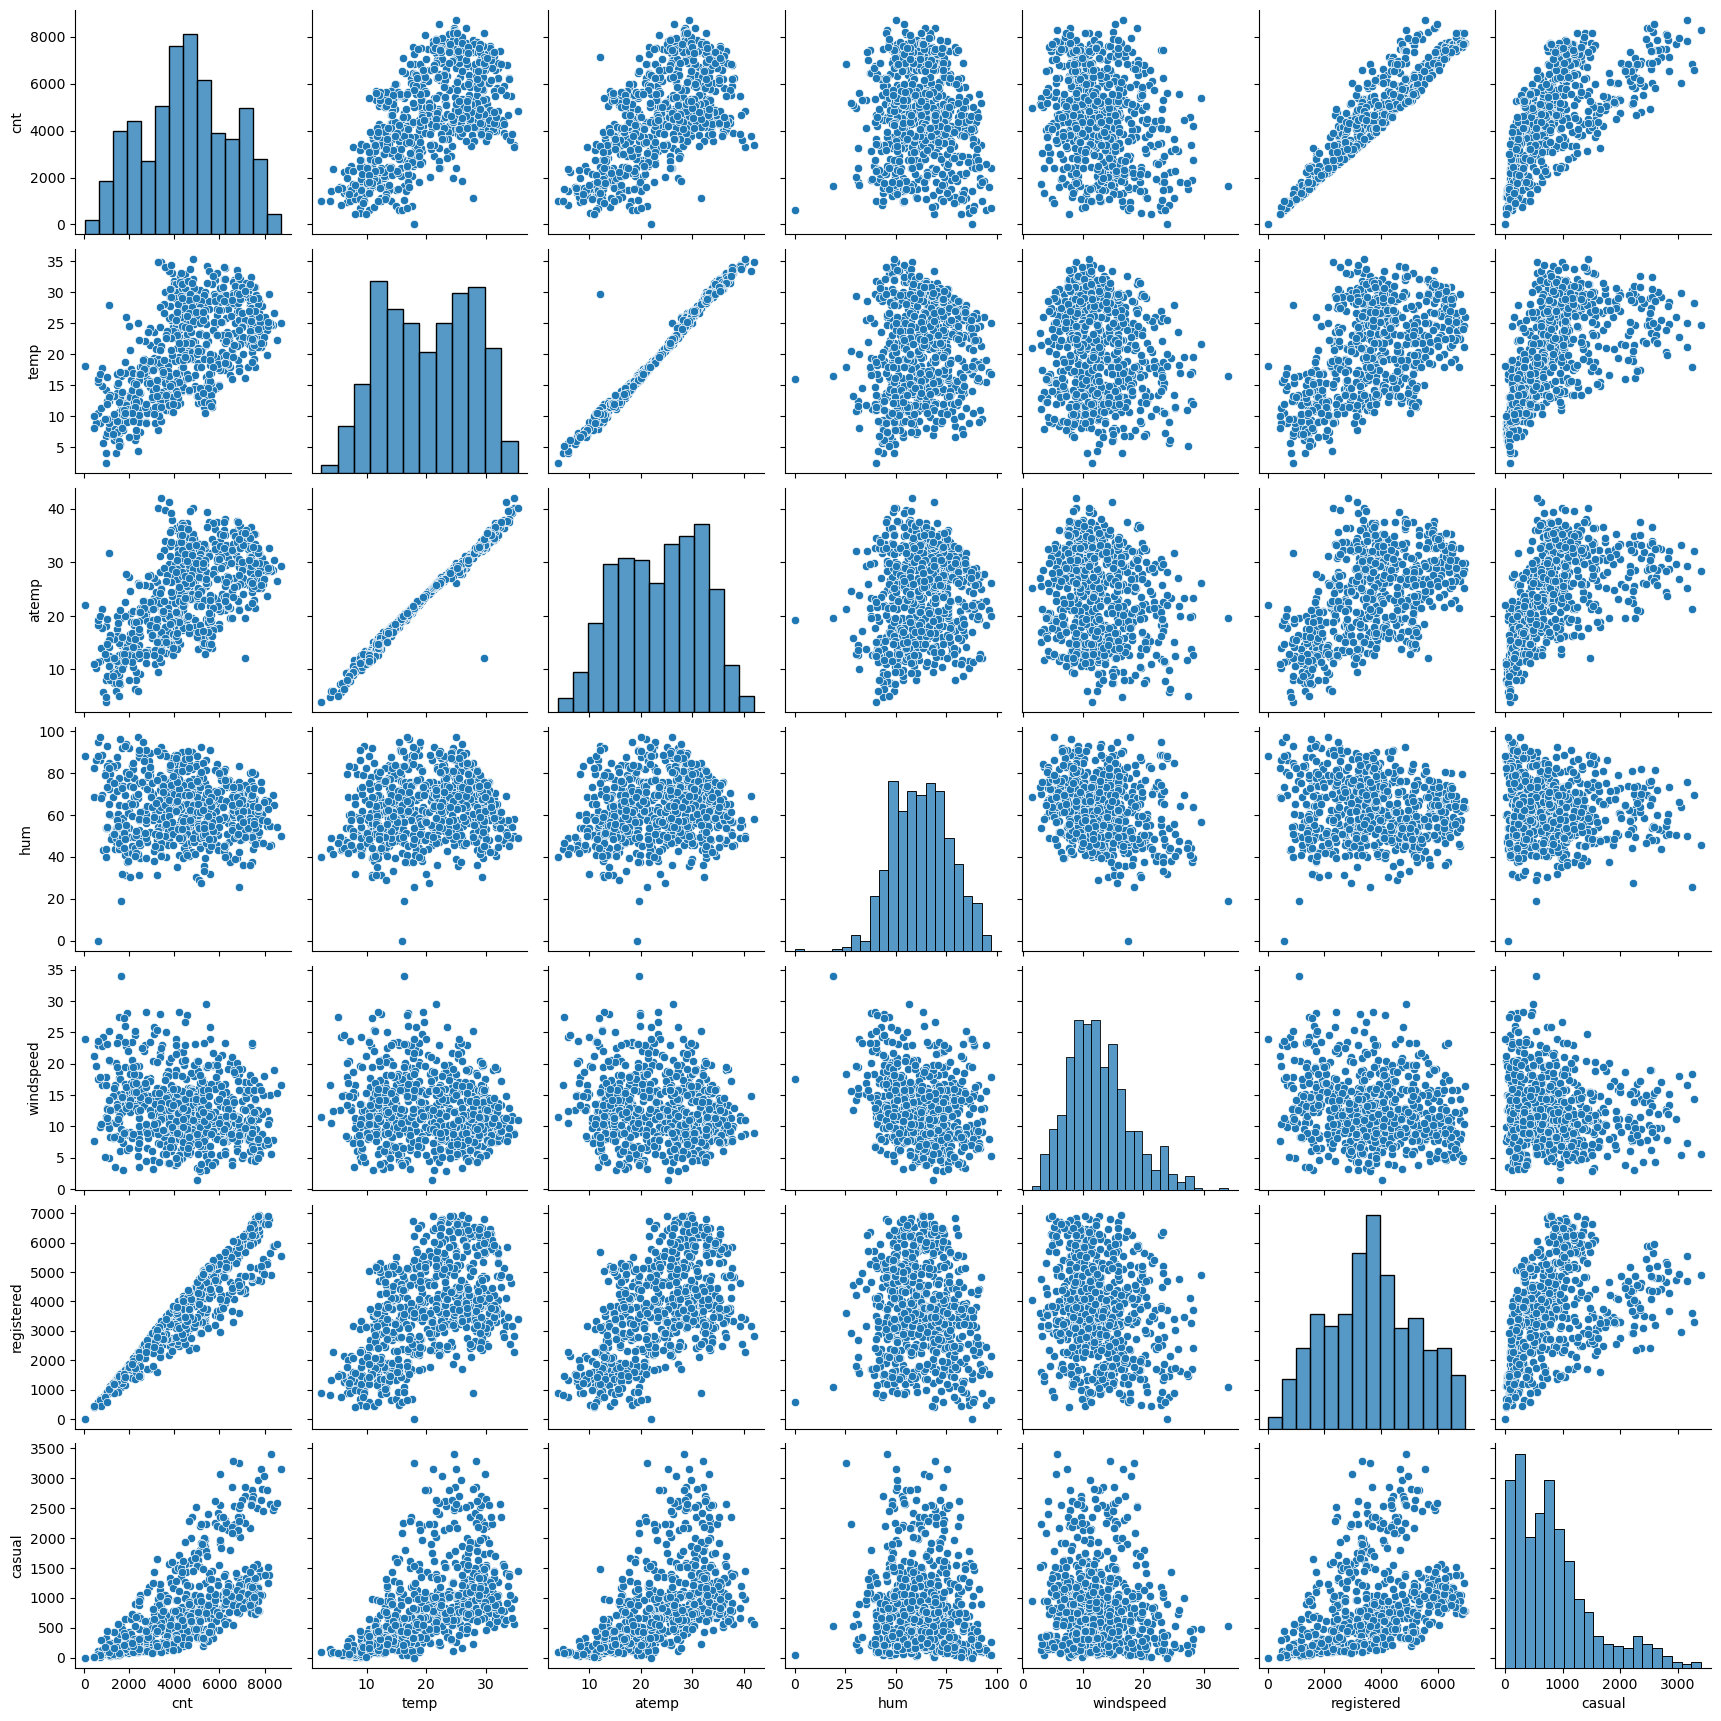

In [1226]:
sns.pairplot(df_bikes[['cnt','temp', 'atemp', 'hum', 'windspeed','registered','casual']])
plt.show()

#### From the pair plot, the relationships between the numerical independent variables (temp, atemp, hum, windspeed) and the target variable (cnt) can be described as follows:

**temp (Temperature) vs. cnt (Total Count):**

`There is a strong positive relationship.` As the temperature increases, the total count of bike demands tends to increase. This suggests that people are more likely to rent bikes on warmer days.

**atemp (Feels-like Temperature) vs. cnt (Total Count):**

`There is a strong positive relationship, similar to temp.` As the feels-like temperature rises, the number of bike demand also increases. This indicates that perceived warmth is a significant factor in bike demand.

**hum (Humidity) vs. cnt (Total Count):**

`There is a weak negative relationship.` Higher humidity levels seem to slightly reduce bike demand, possibly because high humidity can make biking uncomfortable.

**windspeed vs. cnt (Total Count):**

`There is a weak negative relationship.` Higher wind speeds are associated with a decrease in bike demand, likely because biking against strong winds can be difficult and less appealing.

#### Dropping redundant columns 

In [1227]:
df_aq=df_bikes['dteday']  # assign for AQ analysis in the last

# Dropping redundant columns
df_bikes.drop(['dteday'], axis = 1, inplace = True)
df_bikes.drop(['temp_ratio'], axis = 1, inplace = True)
df_bikes.drop(['windspeed_ratio'], axis = 1, inplace = True)
df_bikes.drop(['windspeed_bucket'], axis = 1, inplace = True)
df_bikes.drop(['temp_bucket'], axis = 1, inplace = True)


## Step 3: Data Preparation

In [1228]:
# Check the bike-sharing dataframe now

df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dummy Variables

The dummy variable trap occurs when two or more dummy variables are highly correlated, typically when one dummy variable can be perfectly predicted from the others. This leads to multicollinearity in the regression model.

To avoid this, we typically drop one of the dummy variables for each categorical feature after creating them. we have used the drop_first=True parameter in get_dummies function, which automatically dropped the first category of each categorical variable to prevent multicollinearity issue.

In [1229]:
# Use pd.get_dummies to create dummy variables for categorical features

# List of categorical and numerical variables
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
numerical_features = ['cnt','temp', 'atemp', 'hum', 'windspeed']
# categorical_features_d=['season_2', 'season_3', 'season_4', 'yr_1',
#        'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
#        'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'holiday_1', 'weekday_1',
#        'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
#        'workingday_1', 'weathersit_2', 'weathersit_3']
categorical_features_d=['summer', 'fall', 'winter', 'year',
       'feb', 'march', 'april', 'may', 'jun', 'jul', 'aug',
       'sept', 'oct', 'nov', 'dec',
       'mon','tue', 'wed', 'thu', 'fri', 'sat',
        'workingday','mist_cloudy', 'light_snow_rain']

# Let's drop the first column from dummy df using 'drop_first = True'
X_dummies = pd.get_dummies(df_bikes,columns=categorical_features,prefix=categorical_features, drop_first=True)

# # Rename meaningful names of the columns
X_dummies.rename(
    
       columns={'instant':'instant','dteday': 'dteday','temp': 'temp', 'atemp':'atemp', 'hum':'hum','windspeed':'windspeed','casual': 'casual',
       'registered':'registered', 'cnt':'cnt','season_2': 'summer', 'season_3':'fall', 'season_4':'winter','yr_1': 'year',
       'mnth_2':'feb','mnth_3': 'march','mnth_4': 'april', 'mnth_5':'may','mnth_6': 'jun','mnth_7': 'jul','mnth_8': 'aug',
       'mnth_9':'sept','mnth_10': 'oct','mnth_11': 'nov','mnth_12': 'dec','holiday_1':'holiday', 'weekday_1':'mon',
       'weekday_2':'tue', 'weekday_3':'wed', 'weekday_4':'thu','weekday_5': 'fri','weekday_6': 'sat',
        'workingday_1':'workingday','weathersit_2':'mist_cloudy', 'weathersit_3':'light_snow_rain'},inplace=True)
X_dummies.reset_index()
X_dummies.reindex()

X_dummies[categorical_features_d] =X_dummies[categorical_features_d].apply(lambda x: x.map({False:0,True:1})) 

In [1230]:
X_dummies.head()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,...,holiday,mon,tue,wed,thu,fri,sat,workingday,mist_cloudy,light_snow_rain
0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,...,False,0,0,0,0,0,1,0,1,0
1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,...,False,0,0,0,0,0,0,0,1,0
2,3,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,...,False,1,0,0,0,0,0,1,0,0
3,4,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,...,False,0,1,0,0,0,0,1,0,0
4,5,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,...,False,0,0,1,0,0,0,1,0,0


In [1231]:
X_dummies.columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'summer', 'fall', 'winter', 'year', 'feb', 'march', 'april',
       'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec', 'holiday',
       'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'workingday', 'mist_cloudy',
       'light_snow_rain'],
      dtype='object')

In [1232]:
# Prepare the data

#dataset without dummy variables
X = df_bikes[numerical_features+categorical_features]

# dataset with dummies variables
X_d= X_dummies[numerical_features+categorical_features_d] 
X_d.head()

,cnt,temp,atemp,hum,windspeed,summer,fall,winter,year,feb,...,dec,mon,tue,wed,thu,fri,sat,workingday,mist_cloudy,light_snow_rain
0,985,14.110847,18.18125,80.5833,10.749882,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,801,14.902598,17.68695,69.6087,16.652113,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1349,8.050924,9.47025,43.7273,16.636703,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1562,8.200000,10.60610,59.0435,10.739832,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1600,9.305237,11.46350,43.6957,12.522300,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [1233]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

X_train, X_test= train_test_split(X, train_size = 0.7, test_size = 0.3, random_state = 100)


# We specify this so that the train and test data set always have the same rows, respectively (includes dummy variables) 
# for Automaic and Manual feature selection
X_train_dummy, X_test_dummy = train_test_split(X_d, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1234]:
X_train.shape,X_test.shape,X_train_dummy.shape,X_test_dummy.shape

((510, 12), (219, 12), (510, 29), (219, 29))

### Rescaling the Features 

Here we can see that except for `cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [1235]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [1236]:
scaler = MinMaxScaler()

In [1237]:
# Apply scaler() to all the columns except categorical
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train_dummy[numerical_features] = scaler.fit_transform(X_train_dummy[numerical_features])


In [1238]:
X_train.head()

,cnt,temp,atemp,hum,windspeed,season,yr,mnth,holiday,weekday,workingday,weathersit
653,0.864243,0.509887,0.501133,0.575354,0.300794,4,1,10,0,2,1,1
576,0.827658,0.815169,0.766351,0.725633,0.264686,3,1,7,0,2,1,1
426,0.465255,0.442393,0.438975,0.640189,0.255342,1,1,3,0,6,0,2
728,0.204096,0.245101,0.200348,0.498067,0.663106,1,1,12,0,0,0,1
482,0.482973,0.395666,0.391735,0.504508,0.188475,2,1,4,0,6,0,2


In [1239]:
X_train.describe()

,cnt,temp,atemp,hum,windspeed,season,yr,mnth,holiday,weekday,workingday,weathersit
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.537262,0.512989,0.650369,0.320768,2.517647,0.507843,6.549020,0.025490,2.990196,0.676471,1.401961
std,0.224593,0.225844,0.212385,0.145882,0.169797,1.111947,0.500429,3.468714,0.157763,2.017093,0.468282,0.547540
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.356420,0.339853,0.332086,0.538643,0.199179,2.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000
50%,0.518638,0.540519,0.526811,0.653714,0.296763,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000
75%,0.684710,0.735215,0.688457,0.754830,0.414447,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000


In [1240]:
#for dummy variables
X_train_dummy.head()

,cnt,temp,atemp,hum,windspeed,summer,fall,winter,year,feb,...,dec,mon,tue,wed,thu,fri,sat,workingday,mist_cloudy,light_snow_rain
653,0.864243,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
576,0.827658,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
426,0.465255,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
728,0.204096,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
482,0.482973,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


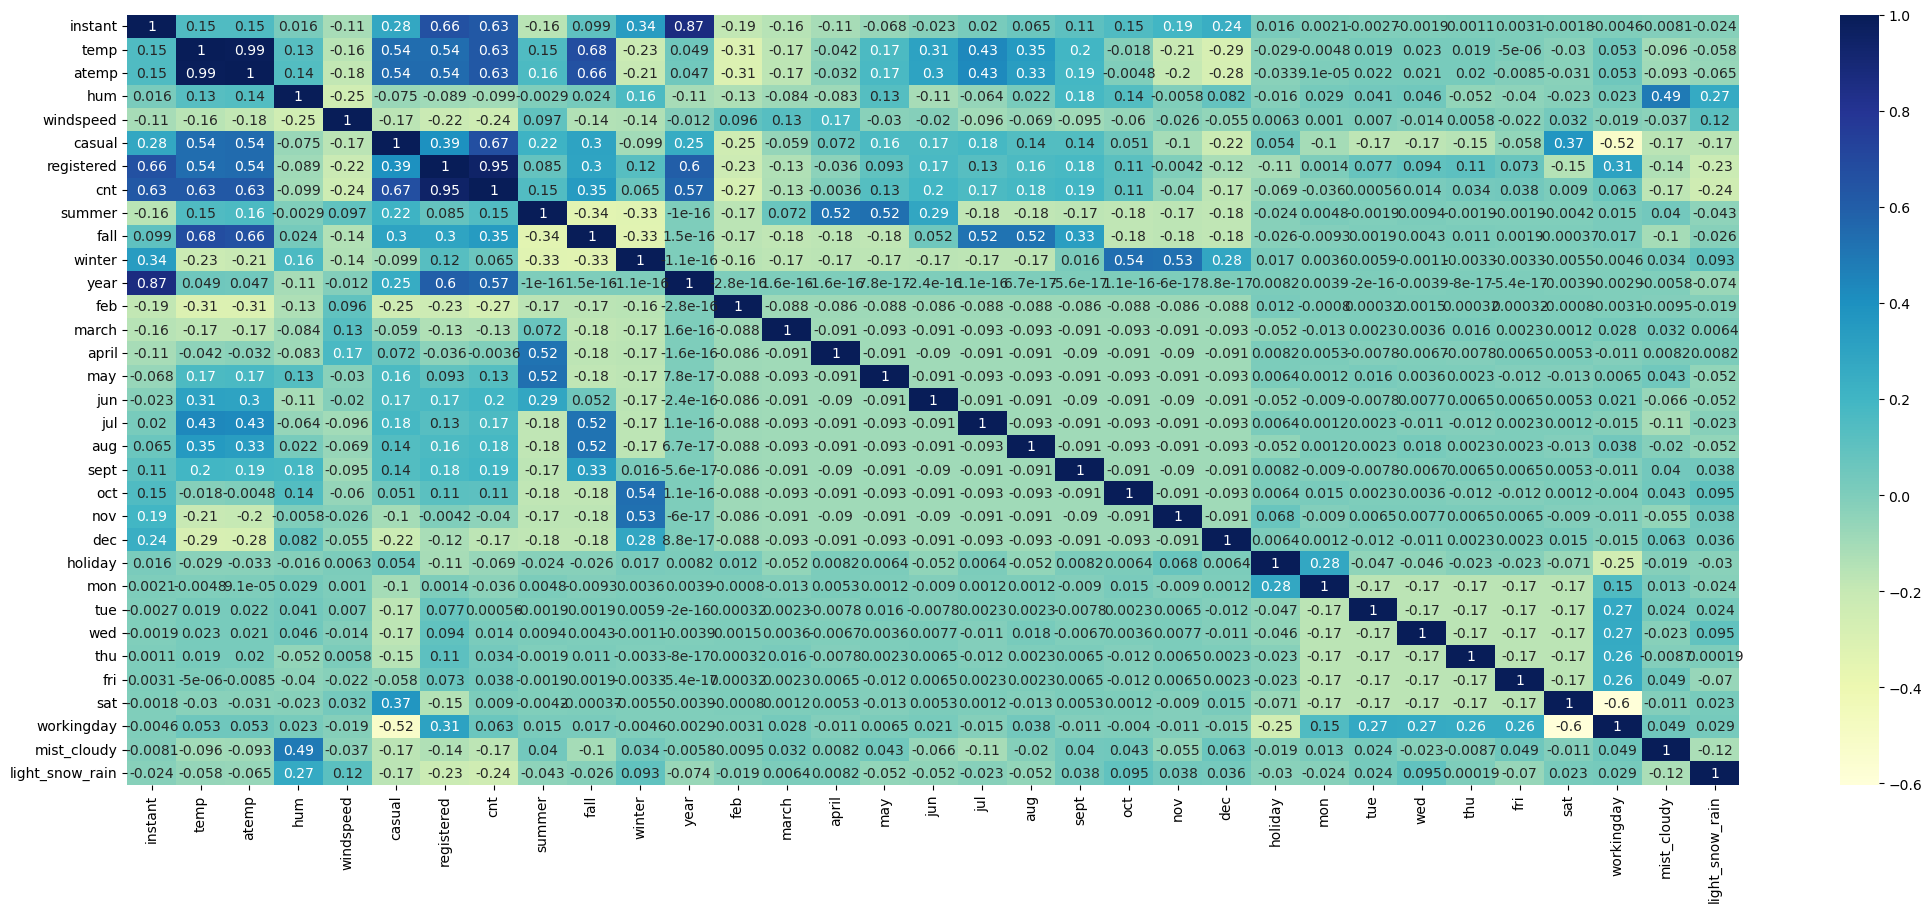

In [1241]:
# Let's check the correlation coefficients with dummy to see which variables are highly correlated

plt.figure(figsize = (26, 10))
sns.heatmap(X_dummies.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1242]:
df_bikes.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.272230e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.272230e-16,1.000000e+00,-5.149955e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.149955e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


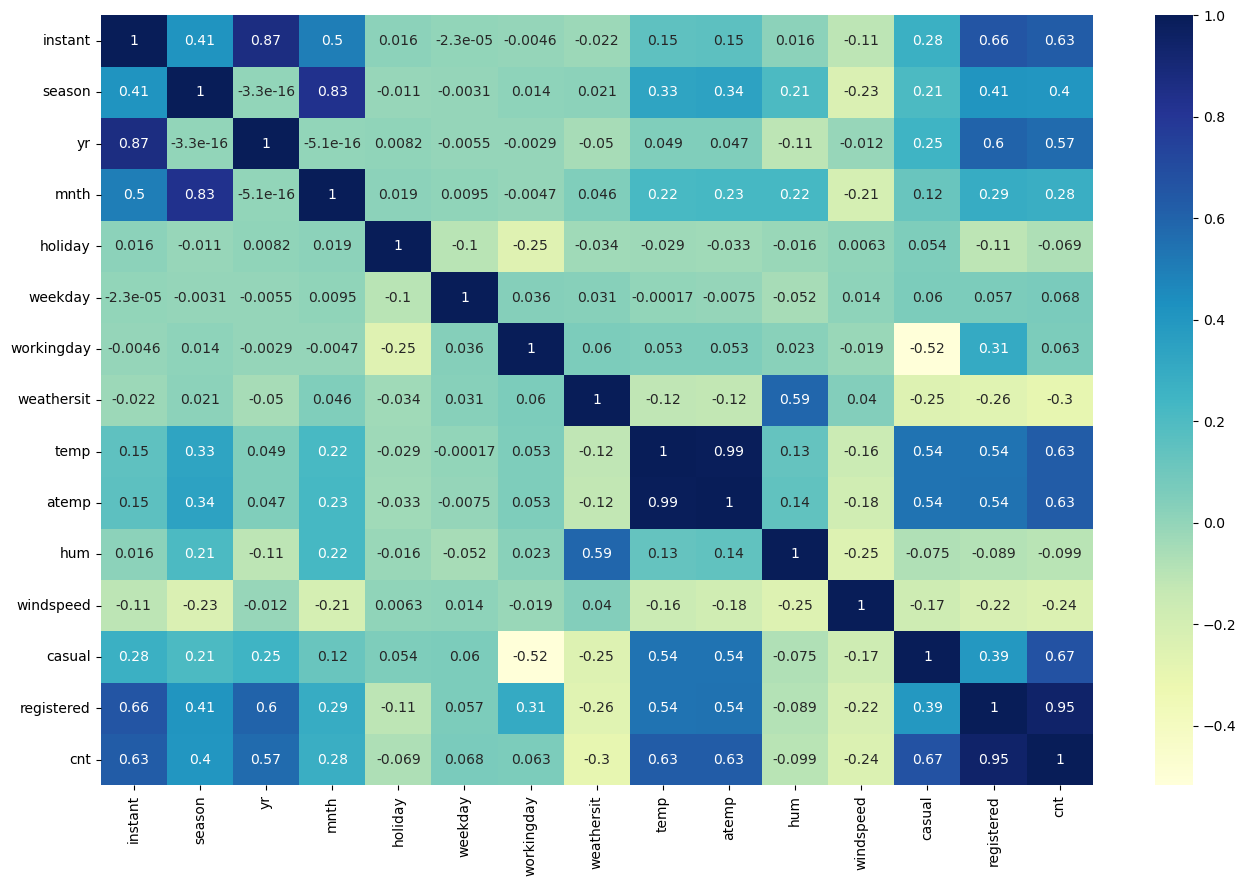

In [1243]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Strong Positive Correlations:

**registered and cnt:** There is a very high positive correlation (0.95) between the number of registered users and the total count (cnt). This indicates that the majority of bike demand are from registered users.

**temp and cnt:** The temperature (temp) shows a moderate positive correlation (0.63) with the total count, suggesting that higher temperatures are associated with more bike demand.

**atemp (feels-like temperature) and cnt:** Similar to temp, there is a moderate positive correlation (0.63), indicating that perceived warmer weather encourages more bike demand.

### Moderate Positive Correlations:

**yr and cnt:** There is a positive correlation (0.57) between the year and the total count, implying an increase in bike demand from 2018 to 2019.
season and cnt: A moderate positive correlation (0.40) suggests that the season affects the number of bike demand, with certain seasons likely having higher rental counts.

### Negative Correlations:

**weathersit and cnt:** There is a negative correlation (-0.30) between the weather situation and the total count. Poorer weather conditions (such as rainy or snowy weather) are associated with fewer bike demand.

**windspeed and cnt:** A slight negative correlation (-0.24) indicates that higher wind speeds might deter bike demand.

**hum (humidity) and cnt:** A weak negative correlation (-0.10) suggests that higher humidity levels may have a minor effect on reducing bike demand.
Insights on Other Variables:

**holiday and cnt:** The correlation is weak (-0.069), indicating that holidays do not significantly impact the total count of bike demand.

**workingday and cnt:** There is a very weak positive correlation (0.063), suggesting that working days have a minor influence on the total count.

### Summary:

The variables registered, temp, and atemp have the strongest positive relationships with the total count of bike demand. In contrast, weathersit, windspeed, and humidity have negative impacts on the number of demand. This information can help in forecasting and strategizing bike rental services by focusing on favorable conditions and understanding patterns in user behavior.

### The VIFs for multicolinearity check

In [1244]:
# Calculate the VIFs for Multicolinearity

vif = pd.DataFrame()
vif['Features'] = df_bikes.columns
vif['VIF'] = [variance_inflation_factor(df_bikes.values, i) for i in range(df_bikes.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,casual,inf
13,registered,inf
14,cnt,inf
0,instant,2211.20
2,yr,842.23
3,mnth,643.00
9,atemp,578.78
8,temp,500.15
10,hum,28.20
1,season,24.82


##### VIF = inf (infinity) indicates perfect multicollinearity.  Since casual, registered, and cnt are closely related (as cnt is the sum of casual and registered), they exhibit perfect multicollinearity. Including all three in a regression model will cause overfitting issues, as the model cannot distinguish their individual effects. Hence we will not include these three and instant (index) variables as well in model building


 `temp` seems to be correlated to `cnt` the most. Let's see a pairplot for `cnt` vs `temp`.


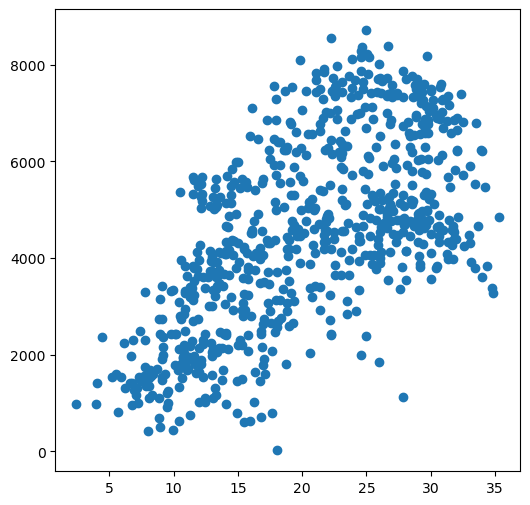

In [1245]:
plt.figure(figsize=[6,6])
plt.scatter(X_dummies.temp, X_dummies.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [1246]:
y_train = X_train.pop('cnt')
X_train = X_train

In [1247]:
X_train.head()

,temp,atemp,hum,windspeed,season,yr,mnth,holiday,weekday,workingday,weathersit
653,0.509887,0.501133,0.575354,0.300794,4,1,10,0,2,1,1
576,0.815169,0.766351,0.725633,0.264686,3,1,7,0,2,1,1
426,0.442393,0.438975,0.640189,0.255342,1,1,3,0,6,0,2
728,0.245101,0.200348,0.498067,0.663106,1,1,12,0,0,0,1
482,0.395666,0.391735,0.504508,0.188475,2,1,4,0,6,0,2


In [1248]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 5: Linear Model Building (Forward Selection)
Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [1249]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

# Check the parameters obtained
lr.params

const    0.169798
temp     0.639952
dtype: float64

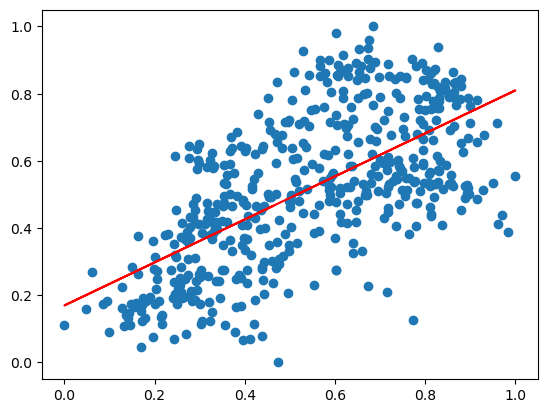

In [1250]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [1251]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           5.80e-61
Time:                        09:47:46   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

## Adding another variable

The R-squared value obtained is `0.414` with F-statistic `359.1`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the highly correlated variable, i.e. `yr`. we will not add `atemp` variable sice this varible have multicolinearity with `temp` variable and doesn't improve much on model performance.

In [1252]:
# Assign the feature variables to X
X_train_lm = X_train[['temp','yr']]

# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.079628
temp     0.583559
yr       0.237213
dtype: float64

In [1253]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          9.25e-130
Time:                        09:47:46   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.0

We have clearly improved the model as the value of R-squared as its value has gone up to `0.690` from `0.414`.
Let's go ahead and add another variable, `season`.

In [1254]:
# Assign  the feature variables to X
X_train_lm = X_train[['temp', 'yr','season']]

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.009938
temp      0.515487
yr        0.239221
season    0.041802
dtype: float64

In [1255]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     452.5
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          8.85e-143
Time:                        09:47:46   Log-Likelihood:                 370.94
No. Observations:                 510   AIC:                            -733.9
Df Residuals:                     506   BIC:                            -716.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.016      0.611      0.5

We have clearly improved the model as the value of R-squared as its value has gone up to `0.728` from `0.690`.

In [1256]:

# Assign  the feature variables to X
X_train_lm = X_train[['temp', 'yr','season','weekday']]

# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     -0.012226
temp       0.514847
yr         0.240417
season     0.042198
weekday    0.006991
dtype: float64

In [1257]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     345.5
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          5.17e-143
Time:                        09:47:46   Log-Likelihood:                 374.66
No. Observations:                 510   AIC:                            -739.3
Df Residuals:                     505   BIC:                            -718.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0122      0.018     -0.676      0.4

Not much improvement after adding weekday. Now let's go ahead and add widnspeed variable.

In [1258]:

# Assign  the feature variables to X
X_train_lm = X_train[['temp', 'yr','season','windspeed']]

# Build a linear model
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        0.078633
temp         0.499965
yr           0.240042
season       0.037628
windspeed   -0.156697
dtype: float64

In [1259]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     362.4
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          7.47e-147
Time:                        09:47:46   Log-Likelihood:                 383.60
No. Observations:                 510   AIC:                            -757.2
Df Residuals:                     505   BIC:                            -736.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0786      0.021      3.768      0.0

#### We have improved the model as the value of R-squared as its value has gone up to `0.742` from `0.732`. and we can also see p-values for all the variabes is 0 which is good. Now let's add all the variables to use another model technique

## Adding all the variables to the model

In [1260]:
# Assign all the feature variables to X
X_train_lm = X_train
#Build a linear model

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.215325
temp          0.217115
atemp         0.276325
hum          -0.093854
windspeed    -0.157316
season        0.048126
yr            0.234621
mnth         -0.001616
holiday      -0.068852
weekday       0.007974
workingday    0.019317
weathersit   -0.080951
dtype: float64

In [1261]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          4.96e-169
Time:                        09:47:46   Log-Likelihood:                 455.82
No. Observations:                 510   AIC:                            -887.6
Df Residuals:                     498   BIC:                            -836.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2153      0.030      7.188      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

### Check for the VIF values of the feature variables. 


In [1262]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,345.60
0,temp,332.53
2,hum,24.99
4,season,23.74
6,mnth,17.12
10,weathersit,12.60
3,windspeed,3.79
9,workingday,3.14
8,weekday,3.04
5,yr,2.01


We generally want a VIF that is less than 5 and P-value less than 0.05. So we can see there are clearly some variables we need to drop.

## Step 6: Linear Model Building (Backward Elimination)

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a high p-value of `0.065` and very high VIF. Let's drop this variables

## Dropping the Variables and Updating the Model

In [1263]:
# Dropping highly correlated variables and insignificant variables
X_New = X_train.drop('atemp', axis=1)

# Build a fitted model
X_train_lm = sm.add_constant(X_New)
lr = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.7
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.84e-169
Time:                        09:47:46   Log-Likelihood:                 454.07
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     499   BIC:                            -839.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2211      0.030      7.405      0.0

In [1264]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_New.columns
vif['VIF'] = [variance_inflation_factor(X_New.values, i) for i in range(X_New.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,24.21
3,season,23.69
5,mnth,17.12
9,weathersit,12.53
0,temp,7.85
2,windspeed,3.72
8,workingday,3.14
7,weekday,3.04
4,yr,2.01
6,holiday,1.09


As you can notice some of the variables have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variables `hum, season` have significantly high VIF but low p-values. Hence, these variable isn't of much use and should be dropped.

In [1265]:
# Dropping highly correlated variables and insignificant variables
X_New = X_New.drop('hum', axis=1)

# Build a fitted model
X_train_lm = sm.add_constant(X_New)

lr = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.11e-169
Time:                        09:47:47   Log-Likelihood:                 451.78
No. Observations:                 510   AIC:                            -883.6
Df Residuals:                     500   BIC:                            -841.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1825      0.024      7.685      0.0

In [1266]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_New.columns
vif['VIF'] = [variance_inflation_factor(X_New.values, i) for i in range(X_New.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,season,23.52
4,mnth,16.94
0,temp,6.58
8,weathersit,6.01
1,windspeed,3.70
7,workingday,3.06
6,weekday,3.02
3,yr,2.01
5,holiday,1.08


In [1267]:
# Dropping highly correlated variables and insignificant variables
X_New = X_New.drop('season', axis=1)

# Build a fitted model
X_train_lm = sm.add_constant(X_New)

lr = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.9
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          4.92e-163
Time:                        09:47:47   Log-Likelihood:                 433.29
No. Observations:                 510   AIC:                            -848.6
Df Residuals:                     501   BIC:                            -810.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2068      0.024      8.524      0.0

As you might have noticed, the variables `season` have significantly high VIF but 0 p-values. and `mnth` have high VIF and `0.375` p-value so let's drop mnth.

also we have noticed that droping `season` significantly decrease R-Squared and F-Statistics 

In [1268]:
# Dropping highly correlated variables and insignificant variables
X_New = X_New.drop('mnth', axis=1)

# Build a fitted model
X_train_lm = sm.add_constant(X_New)

lr= sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     231.0
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          1.56e-152
Time:                        09:47:47   Log-Likelihood:                 405.77
No. Observations:                 510   AIC:                            -795.5
Df Residuals:                     502   BIC:                            -761.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2641      0.024     10.871      0.0

In [1269]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_New.columns
vif['VIF'] = [variance_inflation_factor(X_New.values, i) for i in range(X_New.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit,5.43
0,temp,4.72
1,windspeed,3.70
5,workingday,3.04
4,weekday,2.99
2,yr,2.00
3,holiday,1.07


#### Now all the variables have acceptable range of VIF and almost 0 p-value

## Now let's see if we can further improve the model using dummy variables (more features) with RFE

## Step 7: Model Selection using RFE - Final Model
### By Auto and Manual Correction

### We will use dummy variables to build RFE Model with 29 features

In [1270]:
X_train_dummy.shape,X_test_dummy.shape

((510, 29), (219, 29))

#### Assign X_train and X_test wit dummy scaled dataset

In [1271]:
X_train=X_train_dummy
X_test=X_test_dummy

In [1272]:
# dropping target variable
X_train=X_train.drop('cnt', axis=1)
X_train.head()

,temp,atemp,hum,windspeed,summer,fall,winter,year,feb,march,...,dec,mon,tue,wed,thu,fri,sat,workingday,mist_cloudy,light_snow_rain
653,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
576,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
426,0.442393,0.438975,0.640189,0.255342,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1273]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
rfe = RFE(estimator=lm,n_features_to_select= 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1274]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', False, 6),
 ('winter', True, 1),
 ('year', True, 1),
 ('feb', False, 16),
 ('march', False, 7),
 ('april', False, 9),
 ('may', False, 8),
 ('jun', False, 10),
 ('jul', False, 17),
 ('aug', True, 1),
 ('sept', True, 1),
 ('oct', False, 4),
 ('nov', False, 18),
 ('dec', False, 19),
 ('mon', False, 11),
 ('tue', False, 12),
 ('wed', False, 14),
 ('thu', False, 13),
 ('fri', False, 15),
 ('sat', False, 2),
 ('workingday', False, 3),
 ('mist_cloudy', True, 1),
 ('light_snow_rain', True, 1)]

In [1275]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'summer', 'winter', 'year', 'aug', 'sept',
       'mist_cloudy', 'light_snow_rain'],
      dtype='object')

In [1276]:
X_train.columns[~rfe.support_]

Index(['atemp', 'fall', 'feb', 'march', 'april', 'may', 'jun', 'jul', 'oct',
       'nov', 'dec', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'workingday'],
      dtype='object')

In [1277]:
X_train_lm.shape

(510, 8)

In [1278]:
# Dropping highly correlated variables and insignificant variables
X_train=X_train[col]

# Build a fitted model
X_train_lm = sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train_lm.astype(float)).fit()

# Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.1
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          2.62e-189
Time:                        09:47:47   Log-Likelihood:                 500.94
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     499   BIC:                            -933.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2278      0.027     

In [1279]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
1,hum,14.26
0,temp,9.64
2,windspeed,3.57
8,mist_cloudy,2.12
5,year,2.01
3,summer,1.81
4,winter,1.75
6,aug,1.59
7,sept,1.31
9,light_snow_rain,1.15


#### VIF value is greater than 10 for humidity so let's remove it

In [1280]:
# # Dropping highly correlated variables and insignificant variables
X_train = X_train.drop(['hum'], axis=1)

# # Build a fitted model
X_train_lm = sm.add_constant(X_train)

lr= sm.OLS(y_train, X_train_lm).fit()

# # Print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     270.8
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          6.57e-186
Time:                        09:47:47   Log-Likelihood:                 490.01
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     500   BIC:                            -917.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1264      0.017     

# Inference from the OLS Regression Model Statistics:
## Model Fit:
**R-squared (0.830):** The model explains 83% of the variability in the dependent variable (cnt). This is a strong fit.

**Adjusted R-squared (0.827):** After accounting for the number of predictors, the model still explains 82.7% of the variance, confirming the robustness of the fit.

**F-statistic (270.8, p-value = 6.57e-186):** The model is statistically significant as a whole, indicating that the predictors collectively explain a significant portion of the variation in bike demand.

## Interpretation of Coefficients:

**Intercept (0.1264):** When all other variables are at their reference levels, the bike demand (cnt) starts from a small positive baseline value.

**Temperature (0.5211):** For every unit increase in temperature, bike demand increases by 0.5211 units, holding all other factors constant. (Strong positive impact)

**Windspeed (-0.1516):** For every unit increase in windspeed, bike demand decreases by 0.1516 units, holding other factors constant. (Negative impact)

### Seasonal Effects:

**Summer (0.1016):** Bike demand increases by 0.1016 units during the summer compared to the reference season, holding other factors constant.

**Winter (0.1374):** Winter has a slightly higher positive impact compared to summer, with demand increasing by 0.1374 units.

### Yearly Effects:

**year (0.2328):** Demand increases significantly in 2019 compared to the reference year (2018), suggesting increased bike usage in the second year.

### Monthly Effects:

**August (0.0557):** Demand increases by 0.0557 units in August compared to the reference month.

**September (0.1133):** September sees a stronger positive effect compared to August, with an increase of 0.1133 units.

### Weather Effects:

**Mist/Cloudy (-0.0809):** Weather conditions like mist or cloudy skies reduce bike demand by 0.0809 units compared to clear weather.

**Light Snow/Rain (-0.2786):** Snow or rain has a significantly negative impact, reducing demand by 0.2786 units. (Largest negative impact)

## Model Diagnostics:

**Omnibus (64.857) and Jarque-Bera (151.244):** Both tests suggest that the residuals deviate from normality. While linear regression is somewhat robust to this assumption, a transformation or more flexible model might improve results.

**Durbin-Watson (2.000):** Indicates no significant autocorrelation in residuals, which is a positive sign for the model.


In [1281]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head(15)

,Features,VIF
0,temp,5.01
1,windspeed,3.08
4,year,2.00
2,summer,1.81
5,aug,1.58
3,winter,1.48
7,mist_cloudy,1.48
6,sept,1.30
8,light_snow_rain,1.08


Now as you can see, the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using this model only.

## Step 8: Residual Analysis of the train data

In [1282]:
y_train_pred = lr.predict(X_train_lm)
res = (y_train - y_train_pred)

#### Residuals

In [1283]:
res.describe()

count    5.100000e+02
mean    -4.789197e-17
std      9.266454e-02
min     -4.047162e-01
25%     -4.973312e-02
50%      6.979844e-03
75%      5.487553e-02
max      3.475383e-01
dtype: float64

In [1284]:
X_train.shape,res.shape

((510, 9), (510,))

#### Error Terms visualization

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

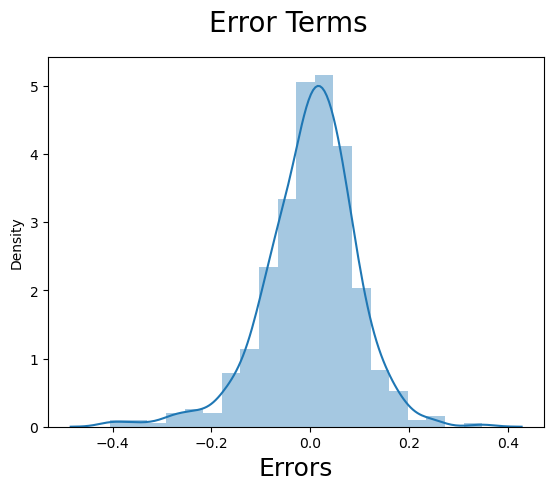

In [1285]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The residuals are following the normally distributed with a mean 0.

#### Looking for patterns in the residuals

In [1286]:
X_train.shape,res.shape

((510, 9), (510,))

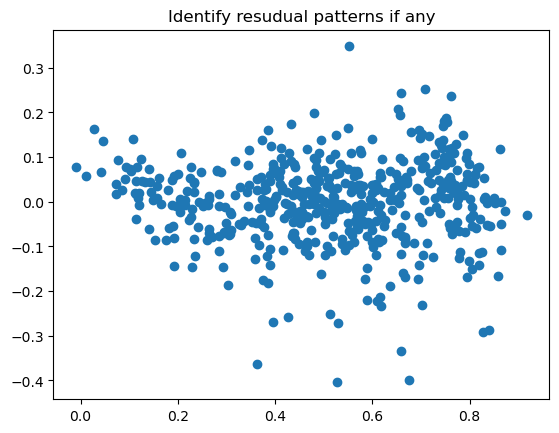

In [1287]:
plt.scatter(y_train_pred,res)
plt.title('Identify resudual patterns if any')
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

The residuals appear to be randomly scattered around the horizontal line at zero. There isn't a clear pattern or trend visible in the scatter of points.

## Step 9: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [1288]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [1289]:
X_test.describe()

,cnt,temp,atemp,hum,windspeed,summer,fall,winter,year,feb,...,dec,mon,tue,wed,thu,fri,sat,workingday,mist_cloudy,light_snow_rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.520592,0.558941,0.532991,0.638508,0.313350,0.264840,0.246575,0.232877,0.479452,0.100457,...,0.086758,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721,0.698630,0.319635,0.027397
std,0.218435,0.233698,0.217888,0.148974,0.159947,0.442259,0.432005,0.423633,0.500722,0.301297,...,0.282125,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202,0.459904,0.467403,0.163612
min,0.048205,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377531,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.524275,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.672745,0.759096,0.714132,0.743928,0.403048,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.963300,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [1290]:
y_test=X_test.pop('cnt')
X_test=X_test[col]

# remve hum to have the same matrix
X_test = X_test.drop('hum', axis=1)


In [1291]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)
X_test_m.head()

,const,temp,windspeed,summer,winter,year,aug,sept,mist_cloudy,light_snow_rain
184,1.0,0.831783,0.084219,0,0,0,0,0,1,0
535,1.0,0.901354,0.153728,1,0,1,0,0,0,0
299,1.0,0.511964,0.334206,0,1,0,0,0,1,0
221,1.0,0.881625,0.339570,0,0,0,1,0,0,0
152,1.0,0.817246,0.537414,1,0,0,0,0,0,0


In [1292]:
# Making predictions using the final model
y_pred_m = lr.predict(X_test_m)

## Step 10: Model Evaluation

### Error Validation

In [1293]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_m)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_m)
mae = mean_absolute_error(y_test,y_pred_m)

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('R Square:', r2)

Mean Absolute Error: 0.07561733155356151
Mean Square Error: 0.00992939444641351
Root Mean Square Error: 0.09964634687941906
R Square: 0.7909416676310566


### Evaluation Metrics:

**Mean Absolute Error (MAE):**

This value indicates that, on average, the model's predictions differ from the actual values by around 0.0756 (on the scale of the normalized or scaled target variable). This suggests that the model performs fairly well in terms of making accurate predictions.

**Mean Squared Error (MSE):**

MSE gives more weight to larger errors due to the squaring of differences. A value of 0.0099 implies that the model generally has a low level of error in its predictions.

**Root Mean Squared Error (RMSE):**

RMSE is the square root of MSE and provides an error measure in the same units as the target variable. An RMSE of 0.989 suggests that the model’s predictions are off by about 0.0996 on average, which is relatively low and indicates a good fit.

**R-Square (R²):**

An R² value of 0.7909 means that the model explains about 79% of the variance in the bike demand counts. This indicates that the model has a strong ability to explain the variability in the target variable based on the predictors.

**Conclusion:**

The model shows strong predictive performance, with low errors (MAE, MSE, RMSE) and a high R² value. This suggests that the model effectively captures the relationships between the predictors and the target variable (cnt - total bike demands). It can be considered reliable for predicting bike demand counts, though there is still room for slight improvement.

### Cross-Validation

In [1294]:
scores = cross_val_score(lm,X_train, y_train, cv=5)
scores

array([0.78824641, 0.8339098 , 0.7988974 , 0.81772399, 0.8328762 ])

### Cross-Validation R² Scores:

Fold 1: 0.7882

Fold 2: 0.8339

Fold 3: 0.7988

Fold 4: 0.8177

Fold 5: 0.8328

**Conclusion:**

The mean R² score from the cross-validation is approximately 0.7988, which is consistent with the R² value of 0.7909 from final model evaluation. This consistency across different folds indicates that the model generalizes well to unseen data, showing robust performance across various subsets of the dataset.

The cross-validation results confirm that the model maintains strong predictive power and is reliable for predicting bike denabd counts, reinforcing the conclusion from the initial model evaluation.

Text(0, 0.5, 'y_pred')

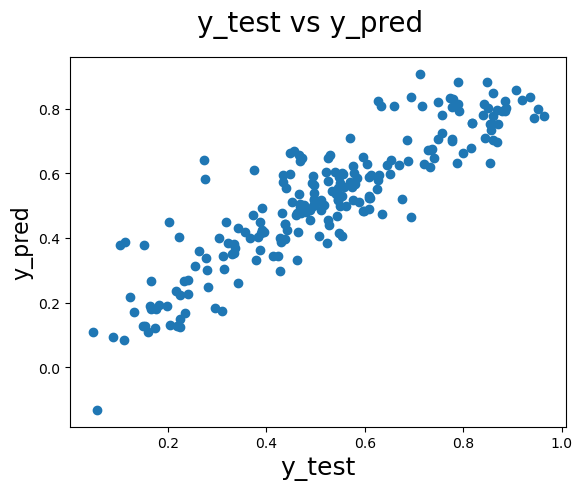

In [1295]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

## Best fittng line plot

In [1296]:

X_train_lm.shape,y_train.shape, y_pred_m.shape,X_test.iloc[:, 0].shape,y_test.shape

((510, 10), (510,), (219,), (219,), (219,))

In [1297]:
X_train.columns

Index(['temp', 'windspeed', 'summer', 'winter', 'year', 'aug', 'sept',
       'mist_cloudy', 'light_snow_rain'],
      dtype='object')

In [1298]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     270.8
Date:                Sat, 25 Jan 2025   Prob (F-statistic):          6.57e-186
Time:                        09:47:47   Log-Likelihood:                 490.01
No. Observations:                 510   AIC:                            -960.0
Df Residuals:                     500   BIC:                            -917.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1264      0.017     

We can see that the equation of our best fitted line is:

$ cnt = 0.1264 + 0.236  \times  temp + 0.5211  \times  windspeed -0.1516 \times summer + 0.1016 \times winter + 0.1374 \times year + 0.2328 \times aug + 0.0557 \times  sept + 0.1133 \times misty\_cloudy - 0.0809 \times light\_snow\_rain - 0.2786   $

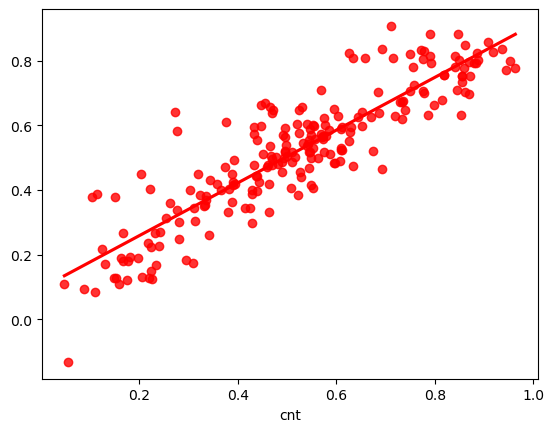

In [1299]:
sns.regplot(x=y_test, y=y_pred_m, ci=None, color="r")
plt.show()

### Actual value and the predicted value

In [1300]:
#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_m})
reg_model_diff.head(),reg_model_diff.tail()


(     Actual value  Predicted value
 184      0.692706         0.466150
 535      0.712034         0.907249
 299      0.303382         0.399024
 221      0.547400         0.590056
 152      0.569029         0.572469,
      Actual value  Predicted value
 400      0.336516         0.368934
 702      0.757478         0.724254
 127      0.495973         0.522194
 640      0.868615         0.796318
 72       0.232858         0.268374)

In [1301]:
y_train.shape,y_pred_m.shape, X_train_lm.shape

((510,), (219,), (510, 10))

### Homoscedasticity

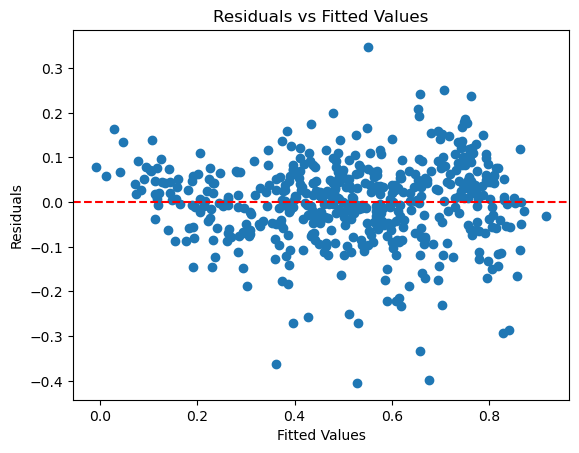

In [1302]:
# Assuming `model` is your fitted regression model
fitted_values = lr.fittedvalues
residuals = lr.resid

plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

The spread of residuals does not show a systematic increase or decrease with the fitted values. This suggests that the assumption of homoscedasticity (constant variance of residuals) is largely satisfied.

The lack of a curve or structure in the plot suggests that the relationship between the independent variables and the dependent variable is linear, supporting the use of a linear regression model.

While there are a few points farther from the center, there are no extreme residuals that would indicate outliers significantly affecting the model's performance.


#### Linerarity

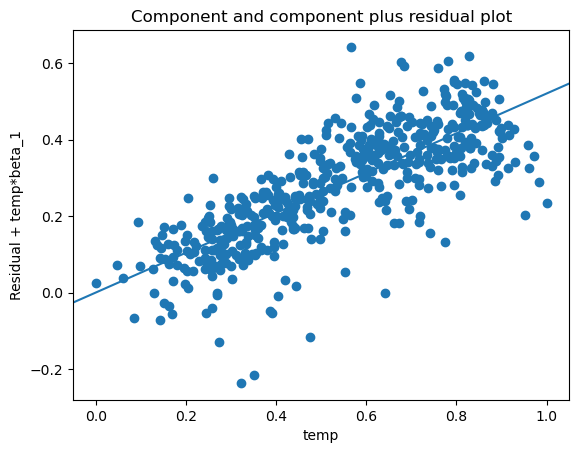

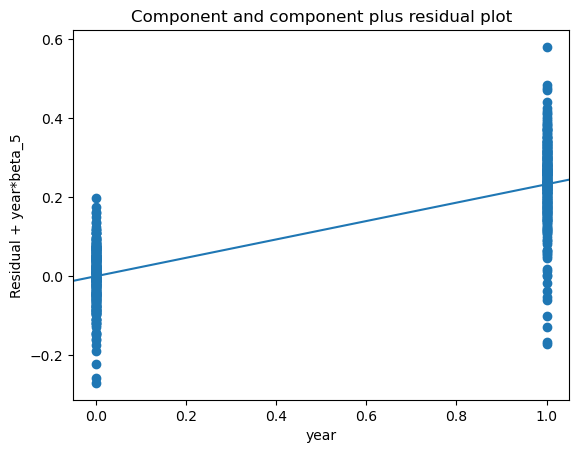

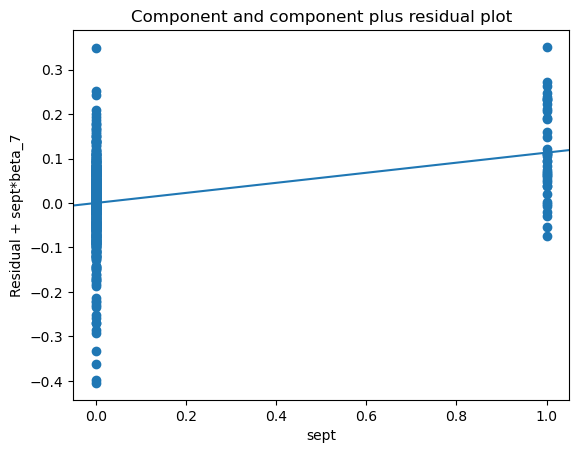

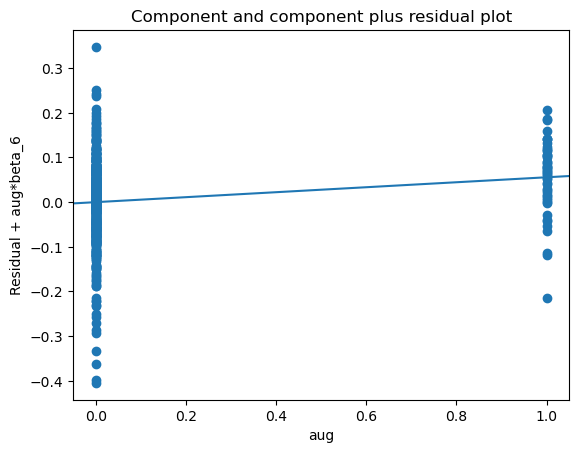

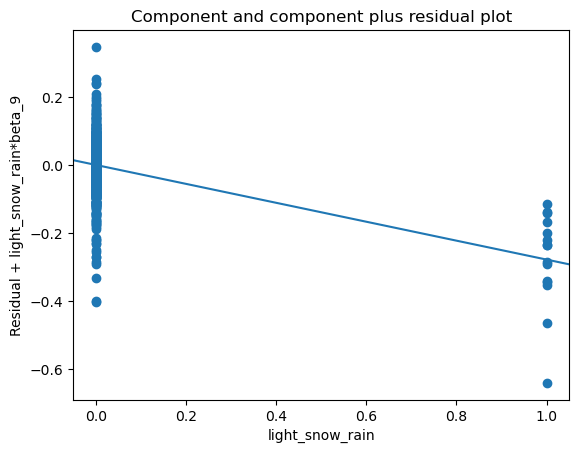

In [1303]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr, 'year')
plt.show()

sm.graphics.plot_ccpr(lr, 'sept')
plt.show()

sm.graphics.plot_ccpr(lr, 'aug')
plt.show()

sm.graphics.plot_ccpr(lr, 'light_snow_rain')
plt.show()

## Durbin-Watson

In [1304]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')


Durbin-Watson statistic: 1.9996850190254107


The Durbin-Watson statistic is a measure used to detect the presence of autocorrelation (correlation between the residuals) in the residuals of a regression analysis. The value of the Durbin-Watson statistic ranges between 0 and 4, and it can be interpreted as follows:

**2: Indicates no autocorrelation.**

**< 2: Indicates positive autocorrelation.**

**> 2: Indicates negative autocorrelation.**

### Interpretation of Value:
### Durbin-Watson Statistic: 1.99

This value is close to 2, suggesting that there is no significant autocorrelation in the residuals of regression model.

A value slightly above 2 (as in this case) indicates a very mild negative autocorrelation, but it is close enough to 2 that it can generally be interpreted as no autocorrelation for practical purposes.

This result supports the assumption of independence of errors, which is a key assumption in ordinary least squares (OLS) regression.

## Pearson's R Correlation

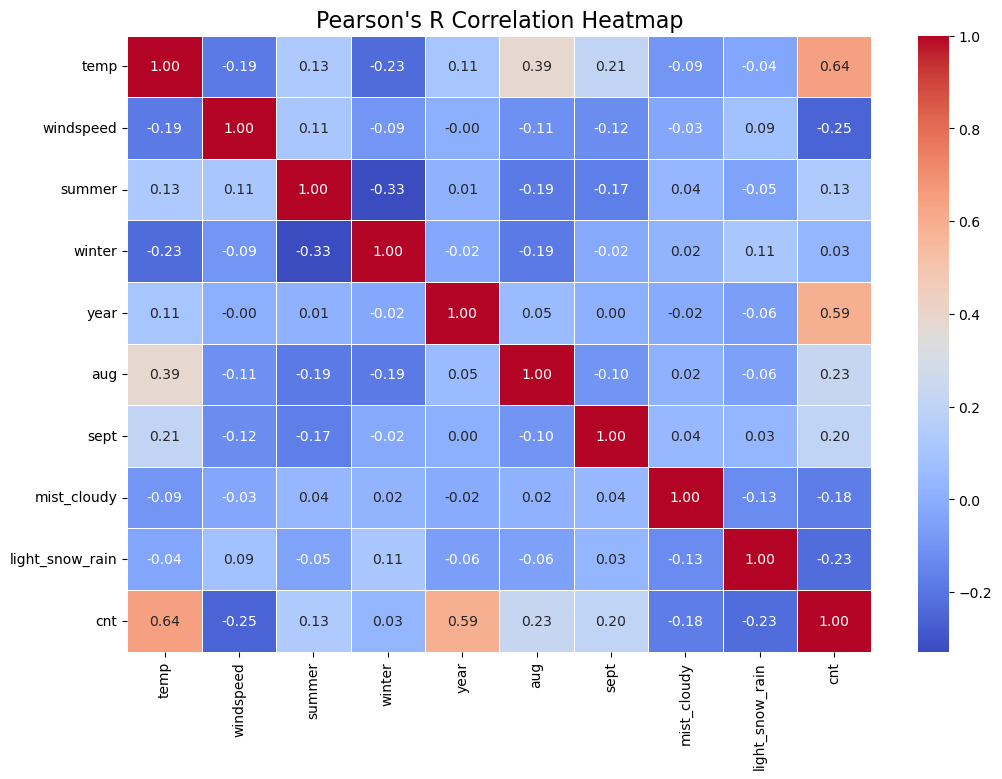

In [1305]:
X_train['cnt']=y_train
correlation_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Pearson's R Correlation Heatmap", fontsize=16)
plt.show()

## The Q-Q plot

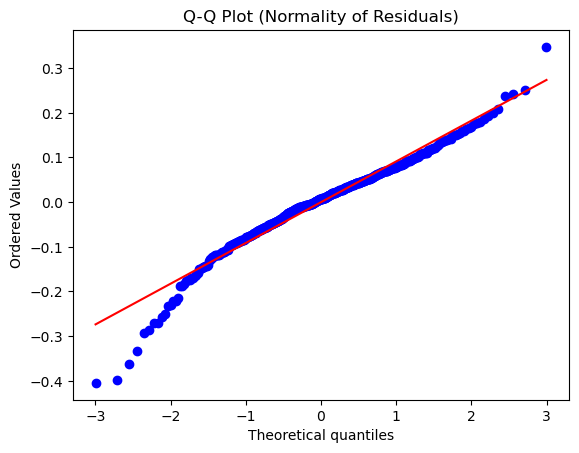

In [1306]:
import scipy.stats as stats

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality of Residuals)')
plt.show()

The Q-Q plot suggests that the distribution of the data is approximately normal. The points largely align with the theoretical quantiles of a normal distribution, indicating that the data follows a similar pattern.

## Anscombe's Quartet

   Quarter Start Date   End Date     Mean cnt  Variance cnt  \
0        1 2018-01-01 2018-07-02  2924.224044  2.190797e+06   

   Correlation (temp, cnt)  Correlation (hum, cnt)  \
0                 0.894639                0.062635   

   Correlation (windspeed, cnt)  Correlation (weathersit, cnt)  \
0                      -0.20053                      -0.272901   

   Correlation (holiday, cnt)  Correlation (season, cnt)  
0                     -0.0599                   0.789444  
   Quarter Start Date   End Date     Mean cnt  Variance cnt  \
0        1 2018-01-01 2018-07-02  2924.224044  2.190797e+06   
1        2 2018-07-03 2019-01-01  3881.224044  1.157458e+06   

   Correlation (temp, cnt)  Correlation (hum, cnt)  \
0                 0.894639                0.062635   
1                 0.524832               -0.314076   

   Correlation (windspeed, cnt)  Correlation (weathersit, cnt)  \
0                     -0.200530                      -0.272901   
1                     -0.249

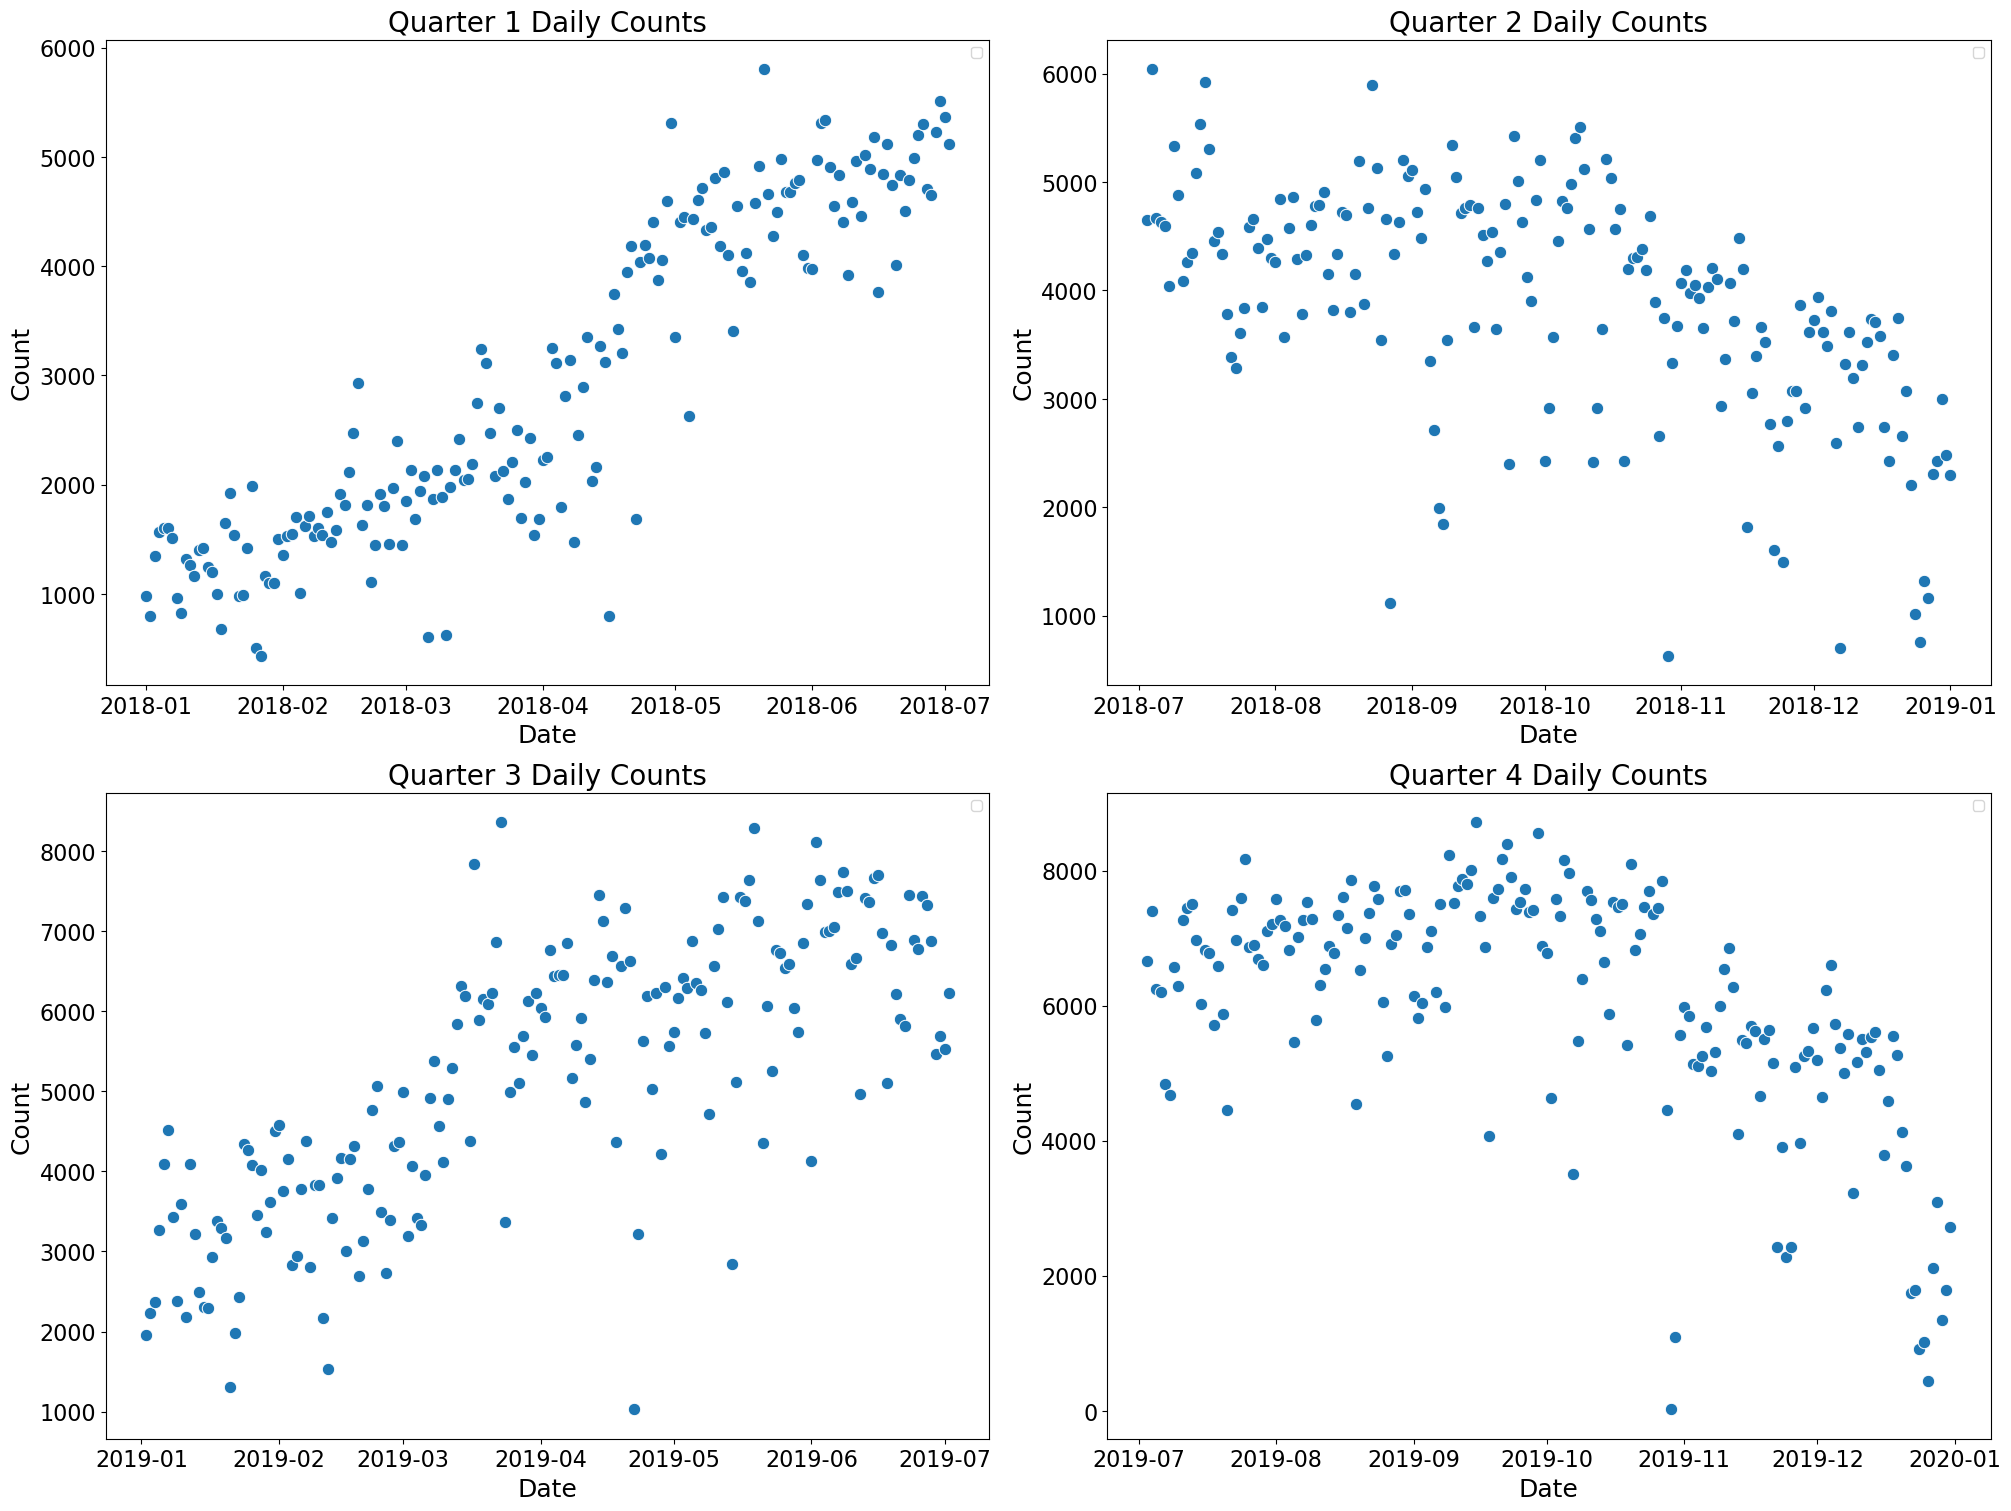

In [1307]:
# Optional: Visualize the quarters 
fig=plt.figure(constrained_layout=True,figsize=(20,15))
gs=GridSpec(2,2,figure=fig)

df_bikes['dteday']=df_aq
#Convert 'dteday' to datetime

df_bikes['dteday']  = pd.to_datetime(df_bikes['dteday'], format='%d-%m-%Y') 

# Sort the data by date
df_bikes = df_bikes.sort_values(by='dteday')
df_bikes['quarter']=df_bikes['dteday'].dt.quarter
# Split the dataset into four quarters
quarters = np.array_split(df_bikes, 4)

# Create a summary of key statistics for each quarter
quarter_summaries = []
j=0    

for i, quarter in enumerate(quarters, 1):
    summary = {
        'Quarter': i,
        'Start Date': quarter['dteday'].min(),
        'End Date': quarter['dteday'].max(),
        'Mean cnt': quarter['cnt'].mean(),
        'Variance cnt': quarter['cnt'].var(),
        'Correlation (temp, cnt)': quarter['temp'].corr(quarter['cnt']),
        'Correlation (hum, cnt)': quarter['hum'].corr(quarter['cnt']),
        'Correlation (windspeed, cnt)': quarter['windspeed'].corr(quarter['cnt']),
        'Correlation (weathersit, cnt)': quarter['weathersit'].corr(quarter['cnt']),
        'Correlation (holiday, cnt)': quarter['holiday'].corr(quarter['cnt']),
        'Correlation (season, cnt)': quarter['season'].corr(quarter['cnt'])}
    quarter_summaries.append(summary)
 
    # Convert the summary to a DataFrame
    quarter_summaries_df = pd.DataFrame(quarter_summaries)

    #Display the summary
    print(quarter_summaries_df)
    if (j==2): 
        j=0   

    if (i<=2):
        axe=fig.add_subplot(gs[0,j])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

    else: 
        axe=fig.add_subplot(gs[1,j])        
    j+=1  
    
    sns.scatterplot(x= quarter['dteday'], y=quarter['cnt'], ax=axe,s=80)
    plt.title(f'Quarter {i} Daily Counts' , fontsize = 20)    
    plt.xlabel('Date', fontsize = 18)    
    plt.ylabel('Count', fontsize = 18)  
    plt.xticks(fontsize=16)  
    plt.yticks(fontsize=16)  
    plt.legend()
plt.show()

##### Scatter plots representing daily demand (count) for different four quarters, Anscombe's Quartet demonstrates the importance of visualizing data, even when statistical measures are similar. 

#### The dataset provides correlation values between the count (cnt) and various factors (temperature, humidity, windspeed, weathersit, holiday, and season) across four quarters. Here's the detailed inference for each factor:

## Quarter-by-Quarter Analysis:

### Quarter 1 (2018-01-01 to 2018-07-02)

**Correlation (temp, cnt):** 0.8946 (Strong positive correlation)

**Correlation (hum, cnt):** 0.0626 (Weak positive correlation)

**Correlation (windspeed, cnt):** -0.2005 (Weak negative correlation)

**Correlation (weathersit, cnt):** -0.2729 (Weak negative correlation)

**Correlation (holiday, cnt):** -0.0599 (Weak negative correlation)

**Correlation (season, cnt):** 0.7894 (Strong positive correlation)

#### Inference:

Temperature and season show a strong positive correlation with the demand (count), indicating higher demand (count) in favorable weather conditions.
Other factors like humidity, windspeed, weathersit, and holiday show weak correlations, suggesting they have minimal influence on the demand (count).

### Quarter 2 (2018-07-03 to 2019-01-01)

**Correlation (temp, cnt):** 0.5248 (Moderate positive correlation)

**Correlation Correlation (hum, cnt):** -0.3141 (Moderate negative correlation)

**Correlation (windspeed, cnt):** -0.2496 (Weak negative correlation)

**Correlation (weathersit, cnt):** -0.4255 (Moderate negative correlation)

**Correlation (holiday, cnt):** -0.0743 (Weak negative correlation)

**Correlation (season, cnt):** 0.1581 (Weak positive correlation)

#### Inference:

Temperature still positively influences the bike demand (count) but to a lesser extent than in Quarter 1.
Humidity and weathersit now show a moderate negative correlation, implying that less favorable weather conditions reduce the demand (count).

Season's influence decreases compared to Quarter 1.

### Quarter 3 (2019-01-02 to 2019-07-02)

**Correlation (temp, cnt):** 0.7917 (Strong positive correlation)

**Correlation (hum, cnt):** -0.1117 (Weak negative correlation)

**Correlation (windspeed, cnt):** -0.2087 (Weak negative correlation)

**Correlation (weathersit, cnt):** -0.3438 (Moderate negative correlation)

**Correlation (holiday, cnt):** -0.1230 (Weak negative correlation)

**Correlation (season, cnt):** 0.6675 (Strong positive correlation)

#### Inference:

Temperature and season regain strong positive correlations, reinforcing their importance.
Humidity, windspeed, weathersit, and holiday continue to show weak to moderate negative correlations.

## Quarter 4 (2019-07-03 to 2019-12-31)

**Correlation (temp, cnt):** 0.6198 (Moderate positive correlation)

**Correlation (hum, cnt):** -0.1794 (Weak negative correlation)

**Correlation (windspeed, cnt):** -0.2816 (Moderate negative correlation)

**Correlation (weathersit, cnt):** -0.4070 (Moderate negative correlation)

**Correlation (holiday, cnt):** -0.1344 (Weak negative correlation)

**Correlation (season, cnt):** 0.2818 (Weak positive correlation)

#### Inference:

Temperature remains moderately positively correlated, while season's influence drops further.
Windspeed and weathersit have a moderate negative correlation, suggesting worsening weather conditions reduce the demand (count).
Holiday continues to have a weak negative impact.

## Overall Insights:

**Temperature and Season:** These are consistently the most influential factors, with temperature showing a strong positive correlation in most quarters, and season having varying influence.

**Weather Conditions (Weathersit, Windspeed, Humidity):** These factors generally exhibit negative correlations, with weathersit and windspeed showing moderate negative correlations in later quarters, indicating less favorable weather reduces the demand (count).

**Holiday:** Has a consistently weak negative correlation, suggesting a slight decrease in demand (counts) during holidays.

This analysis reflects how different environmental and temporal factors influence the demand (count) over time, emphasizing the need for contextual understanding similar to the lessons from Anscombe's quartet.